### Lending Club Case Study

### Problem Statement

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

![Loan Analysis](problem_view.png)

When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
 

Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

In [1]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Extra - To Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Display max columns
pd.set_option('display.max_columns', None)

In [2]:
# Get the version of libraries used
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
import matplotlib
print(matplotlib.__version__)

2.0.2
2.2.2
0.13.2
3.9.2


Data Loading

In [3]:
# Read the data into a dataframe
data = pd.read_csv("loan.csv", header = 0)

In [4]:
# Shape of data (Rows * Cols)
data.shape

(39717, 111)

In [5]:
# data info
data.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  \
0       36 months   10.65%       162.87     B        B2   
1       6


Data Handling and Cleaning
The first few steps involve making sure that there are no missing values or incorrect data types before we proceed to the analysis stage. These aforementioned problems are handled as follows:

For Missing Values: Some common techniques to treat this issue are

Dropping the rows containing the missing values
Imputing the missing values
Keep the missing values if they don't affect the analysis
Incorrect Data Types:

Clean certain values
Clean and convert an entire column

In [6]:
# check for null/na values counts in columns
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
# Drop empty colmuns (where all values of column is null/na)
data = data.dropna(how='all', axis=1)
data.shape

(39717, 57)

In [8]:
# Identify empty rows (where all values in row is na/null)
data = data.dropna(how='all', axis=0)
data.shape

(39717, 57)

There are no 111-57 = 54 columns which have all values as null or empty.
There are no rows which have empty values for all cols.

Columns are - 
1. mths_since_last_major_derog
2. annual_inc_joint
3. dti_joint
4. verification_status_joint
5. tot_coll_amt
6. tot_cur_bal
7. open_acc_6m
8. open_il_6m
9. open_il_12m
10. open_il_24m
11. mths_since_rcnt_il
12. total_bal_il
13. il_util
14. open_rv_12m
15. open_rv_24m
16. max_bal_bc
17. all_util
18. total_rev_hi_lim
19. inq_fi
20. total_cu_tl
21. inq_last_12m
22. acc_open_past_24mths
23. avg_cur_bal
24. bc_open_to_buy
25. bc_util
26. mo_sin_old_il_acct
27. mo_sin_old_rev_tl_op
28. mo_sin_rcnt_rev_tl_op
29. mo_sin_rcnt_tl
30. mort_acc
31. mths_since_recent_bc
32. mths_since_recent_bc_dlq
33. mths_since_recent_inq
34. mths_since_recent_revol_delinq
35. num_accts_ever_120_pd
36. num_actv_bc_tl
37. num_actv_rev_tl
38. num_bc_sats
39. num_bc_tl
40. num_il_tl
41. num_op_rev_tl
42. num_rev_accts
43. num_rev_tl_bal_gt_0
44. num_sats
45. num_tl_120dpd_2m
46. num_tl_30dpd
47. num_tl_90g_dpd_24m
48. num_tl_op_past_12m
49. pct_tl_nvr_dlq
50. percent_bc_gt_75
51. tot_hi_cred_lim
52. total_bal_ex_mort
53. total_bc_limit
54. total_il_high_credit_limit

54 columns Removed

In [9]:
# Check for duplicates on basis of 'Id' Column and keep first row if duplicate found
data = data.drop_duplicates(subset=['id'],keep='first')
data.shape

(39717, 57)

No duplicate records found

In [10]:
# Now Identify columns which have only single values. Because single value columns are not usable

single_value_columns = [col for col in data.columns if data[col].nunique() == 1]
single_value_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

All Single value cols are -
1. pymnt_plan 
2. initial_list_status
3. policy_code
4. acc_now_delinq
5. chargeoff_within_12_mths
6. delinq_amnt
7. tax_liens

In [11]:
dataSingleValueCols = data[single_value_columns]
dataSingleValueCols.head()

,pymnt_plan,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [12]:
# we can drop single value columns
data = data.drop(columns=single_value_columns)
data.shape

(39717, 48)

7 single valued columns dropped

Now Identify numeric columns and remove columns which are not useful for our analysis

In [13]:
# Numeric columns
numeric_columns_dtype = data.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_columns_dtype

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'pub_rec_bankruptcies']

In [14]:
dataWithIdMemberId = data[['id','member_id']]
dataWithIdMemberId.head()

,id,member_id
0,1077501,1296599
1,1077430,1314167
2,1077175,1313524
3,1076863,1277178
4,1075358,1311748


From numeric columns we can drop below columns which can't be useful for our analysis

1. id
2. member_id

In [15]:
data = data.drop(columns=['id','member_id'])
data.shape

(39717, 46)

2 columns dropped

Now Identify object or categorical columns

In [16]:
cat_columns_dtype = data.select_dtypes(include=['object']).columns.tolist()
cat_columns_dtype

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [17]:
dataWithCategorical = pd.DataFrame(data=data,columns=list(cat_columns_dtype))
dataWithCategorical.head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,Jan-85,83.70%,Jan-15,NaN,May-16
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,Apr-99,9.40%,Apr-13,NaN,Sep-13
2,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,Nov-01,98.50%,Jun-14,NaN,May-16
3,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,Feb-96,21%,Jan-15,NaN,Apr-16
4,60 months,12.69%,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,Jan-96,53.90%,May-16,Jun-16,May-16


Here we can see folliwng columns which can't be useful for our analysis. lets drop them first

1. addr_state
2. desc
3. emp_title
4. title
5. url
6. zip_code

In [18]:
dataWithNonUsefulCols = data[['addr_state','desc','emp_title','title','url','zip_code']]
dataWithNonUsefulCols.head()

,addr_state,desc,emp_title,title,url,zip_code
0,AZ,Borrower added on 12/22/11 > I need to upgra...,NaN,Computer,https://lendingclub.com/browse/loanDetail.acti...,860xx
1,GA,Borrower added on 12/22/11 > I plan to use t...,Ryder,bike,https://lendingclub.com/browse/loanDetail.acti...,309xx
2,IL,NaN,NaN,real estate business,https://lendingclub.com/browse/loanDetail.acti...,606xx
3,CA,Borrower added on 12/21/11 > to pay for prop...,AIR RESOURCES BOARD,personel,https://lendingclub.com/browse/loanDetail.acti...,917xx
4,OR,Borrower added on 12/21/11 > I plan on combi...,University Medical Group,Personal,https://lendingclub.com/browse/loanDetail.acti...,972xx


In [19]:
data = data.drop(columns=['addr_state','desc','emp_title','title','url','zip_code'])
data.shape

(39717, 40)

6 columns dropped

Let's analyze few more columns which are not categorical

These columns will be used as numeric
1. term 
2. revol_util
3. emp_length
4. int_rate


These columns will be used as date
1. issue_d
2. earliest_cr_line
3. last_pymnt_d
4. last_credit_pull_d


In [20]:
# Remove % from 'int_rate' & 'revol_util'
data['int_rate'] = data['int_rate'].str.rstrip('%')
data['revol_util'] = data['revol_util'].str.rstrip('%')

Analysis of 'revol_util'

In [21]:
data['revol_util'].isnull().sum()

np.int64(50)

In [22]:
data['revol_util'] = data['revol_util'].astype('float64')

In [23]:
mean_revol_util = data['revol_util'].mean()
data['revol_util'] = data['revol_util'].fillna(mean_revol_util)

Check for 'int_rate' column

In [24]:
data['int_rate'].isnull().sum()

np.int64(0)

In [25]:
# Remove month from term
data['term'] = data['term'].str.replace(" months", "", regex=False)
data['term'] =  data['term'].astype(int)

Check 'emp_length' column

In [26]:
data['emp_length'].isna().sum()

np.int64(1075)

There are NA values in 'emp_length' so first we need to fill NA values and then convert to integer 
e.g. < 1 year to 0, 10+ year to 10, 1 year to 1, 2 year to 2 and so on


In [27]:
# we will fill na value with most frequent data that is mode
data['emp_length'].mode()

0    10+ years
Name: emp_length, dtype: object

In [28]:
mode_emp_length = data['emp_length'].mode()[0]
data['emp_length'] = data['emp_length'].fillna(mode_emp_length)

In [29]:
data['emp_length'].isna().sum()

np.int64(0)

In [30]:
# Replace "< 1 year" with "0" and "10+ years" with "10"
data['emp_length'] = data['emp_length'].replace({'< 1 year': '0', '10+ years': '10'}, regex=False)

# Remove ' years' and ' year' text
data['emp_length'] = data['emp_length'].astype(str).str.replace(" years", "", regex=False).str.replace(" year", "", regex=False)

# Convert the column to numeric
data['emp_length'] = pd.to_numeric(data['emp_length'])

Now Drop columns which has more than 30 % NA values

In [31]:
data.isnull().mean() * 100

loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_length                  0.000000
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.662487
mths_since_last_record     92.985372
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
revol_util                  0.000000
total_acc                   0.000000
out_prncp                   0.000000
o

In [32]:
na_columns = data.columns[data.isna().any()].tolist()
na_columns

['mths_since_last_delinq',
 'mths_since_last_record',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'pub_rec_bankruptcies']

In [33]:
data[na_columns].isna().sum()

mths_since_last_delinq    25682
mths_since_last_record    36931
last_pymnt_d                 71
next_pymnt_d              38577
last_credit_pull_d            2
pub_rec_bankruptcies        697
dtype: int64

As we can see 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d' are mostly null
so we can drop them

In [34]:
data = data.drop(columns=['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'])
data.shape

(39717, 37)

In [35]:
na_columns = data.columns[data.isna().any()].tolist()
data[na_columns].isna().sum()

last_pymnt_d             71
last_credit_pull_d        2
pub_rec_bankruptcies    697
dtype: int64

Drop rows for above columns because it is very less


In [36]:
data['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [37]:
data['pub_rec_bankruptcies'].mode()

0    0.0
Name: pub_rec_bankruptcies, dtype: float64

For 'pub_rec_bankruptcies' mode is 0 so we can fill with 0

In [38]:
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(0)

Drop rows for 'last_pymnt_d' & 'last_credit_pull_d' where value is NA

In [39]:
data = data.dropna(subset=['last_pymnt_d', 'last_credit_pull_d'])

After more analysis we found below categorical columns

Categorical columns

In [40]:
data['home_ownership'].value_counts()

home_ownership
RENT        18846
MORTGAGE    17644
OWN          3053
OTHER          98
NONE            3
Name: count, dtype: int64

We can assume 'OTHER' & 'NONE' as 'OTHER' only or we can drop 3 records for NONE

In [41]:
# we can convert 'NONE' to 'OTHER'
data['home_ownership'] = data['home_ownership'].replace('NONE', 'OTHER')
data['home_ownership'].value_counts()

home_ownership
RENT        18846
MORTGAGE    17644
OWN          3053
OTHER         101
Name: count, dtype: int64

In [42]:
data['grade'].value_counts()

grade
B    12005
A    10078
C     8073
D     5294
E     2833
F     1047
G      314
Name: count, dtype: int64

In [43]:
data['sub_grade'].value_counts()

sub_grade
B3    2915
A4    2886
A5    2738
B5    2702
B4    2506
C1    2133
B2    2054
C2    2004
B1    1828
A3    1809
C3    1522
A2    1507
D2    1345
C4    1232
C5    1182
D3    1171
A1    1138
D4     978
D1     928
D5     872
E1     763
E2     650
E3     551
E4     453
E5     416
F1     329
F2     248
F3     185
F4     167
F5     118
G1     102
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64

In [44]:
data['verification_status'].value_counts()

verification_status
Not Verified       16882
Verified           12789
Source Verified     9973
Name: count, dtype: int64

In [45]:
data['purpose'].value_counts()

purpose
debt_consolidation    18612
credit_card            5127
other                  3982
home_improvement       2973
major_purchase         2182
small_business         1819
car                    1549
wedding                 941
medical                 692
moving                  583
vacation                381
house                   379
educational             322
renewable_energy        102
Name: count, dtype: int64

In [46]:
data['loan_status'].value_counts()

loan_status
Fully Paid     32949
Charged Off     5555
Current         1140
Name: count, dtype: int64

# We can not make analysis for 'Current' Loan, so we can drop data for this


In [47]:
data = data[data['loan_status'] != "Current"]
data['loan_status'].value_counts()

loan_status
Fully Paid     32949
Charged Off     5555
Name: count, dtype: int64

These columns will be used as date
1. issue_d -- The month which the loan was funded
2. earliest_cr_line -- The month the borrower's earliest reported credit line was opened
3. last_pymnt_d -- Last month payment was received
4. last_credit_pull_d -- The most recent month LC pulled credit for this loan

From above dates, we can extract month year by creating separate columns
Lets first check which date would be best for our analysis


As per data dictionary details, we can use 'issue_d' for our analysis. other dates can be used further. we will convert other dates as well if required


In [48]:
data['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 38504, dtype: object

In [49]:
data['issue_d'] = pd.to_datetime(data['issue_d'],format='%b-%y')
data['year'] = data['issue_d'].dt.year
data['month'] = data['issue_d'].dt.month

In [50]:
data.shape

(38504, 39)

Now we have done treatment for NA values or non useful information. Now proceed for Outlier check

Check for outliers

1. loan_amnt
2. funded_amnt
3. funded_amnt_inv
4. int_rate
5. annual_inc
6. dti
7. total_pymnt

we will convert to numeric if any column is of object type


In [51]:
data['loan_amnt'].describe()

count    38504.000000
mean     11052.494546
std       7346.828612
min        500.000000
25%       5318.750000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

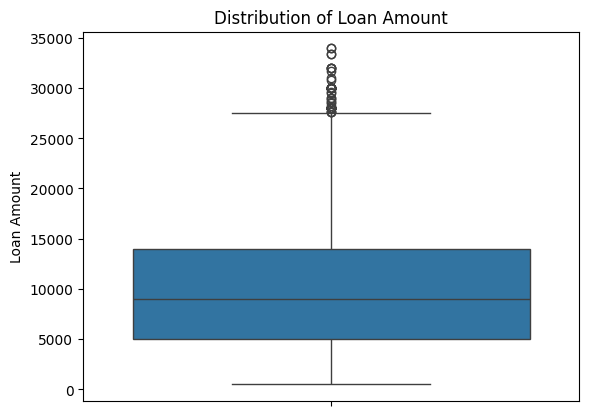

In [130]:
sns.boxplot(data['loan_amnt'])
plt.title('Distribution of Loan Amount')
plt.ylabel('Loan Amount')
plt.show()

Here data points above the 99th percentile (or below the 1st percentile) can be considered extreme outliers.

In [53]:
# Remove Outliers quantile .99 from Loan Amount
data = data[data['loan_amnt'] < data['loan_amnt'].quantile(0.99)]

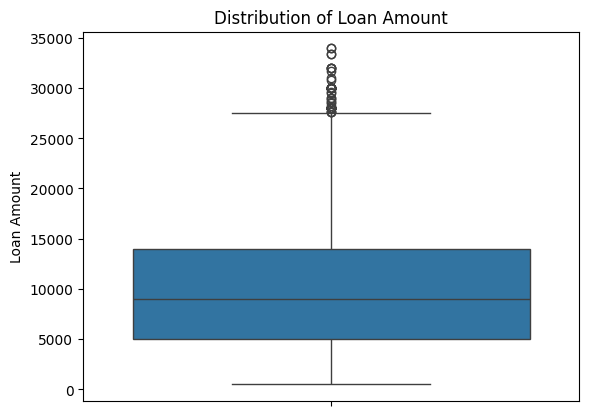

In [129]:
sns.boxplot(data['loan_amnt'])
plt.title('Distribution of Loan Amount')
plt.ylabel('Loan Amount')
plt.show()

In [55]:
data['funded_amnt'].describe()

count    37904.000000
mean     10434.795800
std       6534.876186
min        500.000000
25%       5000.000000
50%       9200.000000
75%      14500.000000
max      34800.000000
Name: funded_amnt, dtype: float64

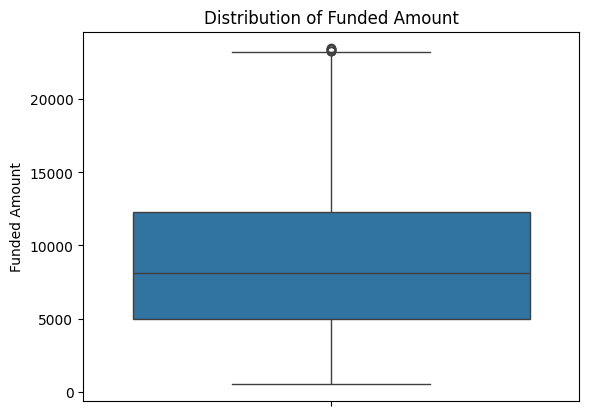

In [142]:
sns.boxplot(data['funded_amnt'])
plt.title('Distribution of Funded Amount')
plt.ylabel('Funded Amount')
plt.show()

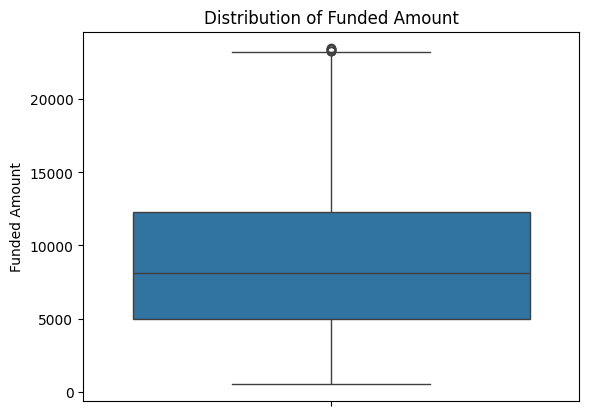

In [141]:
# Remove Outliers quantile .99 from funded_amnt
data = data[data['funded_amnt'] < data['funded_amnt'].quantile(0.99)]
sns.boxplot(data['funded_amnt'])
plt.title('Distribution of Funded Amount')
plt.ylabel('Funded Amount')
plt.show()

In [58]:
data['funded_amnt_inv'].describe()

count    37493.000000
mean      9666.572148
std       6159.072794
min          0.000000
25%       5000.000000
50%       8400.000000
75%      13500.000000
max      29825.000000
Name: funded_amnt_inv, dtype: float64

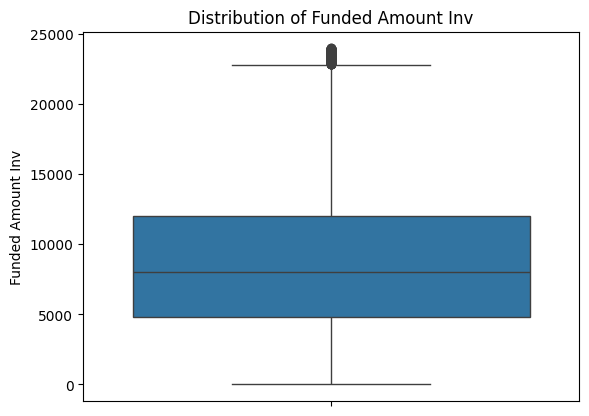

In [140]:
sns.boxplot(data['funded_amnt_inv'])
plt.title('Distribution of Funded Amount Inv')
plt.ylabel('Funded Amount Inv')
plt.show()

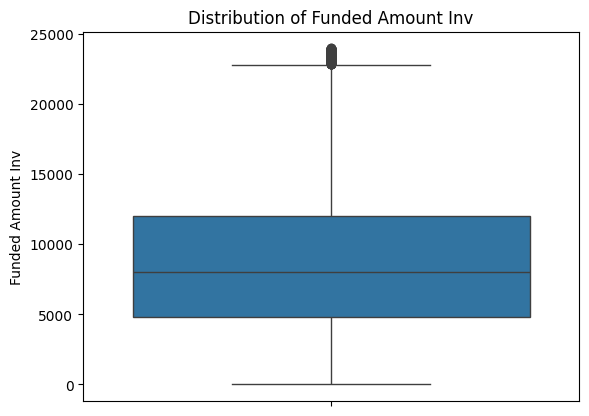

In [139]:
# Remove Outliers quantile .99 from funded_amnt_inv
data = data[data['funded_amnt_inv'] < data['funded_amnt_inv'].quantile(0.99)]
sns.boxplot(data['funded_amnt_inv'])
plt.title('Distribution of Funded Amount Inv')
plt.ylabel('Funded Amount Inv')
plt.show()

In [61]:
data['annual_inc'].describe()

count    3.703100e+04
mean     6.684221e+04
std      6.302314e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.700000e+04
75%      8.000000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

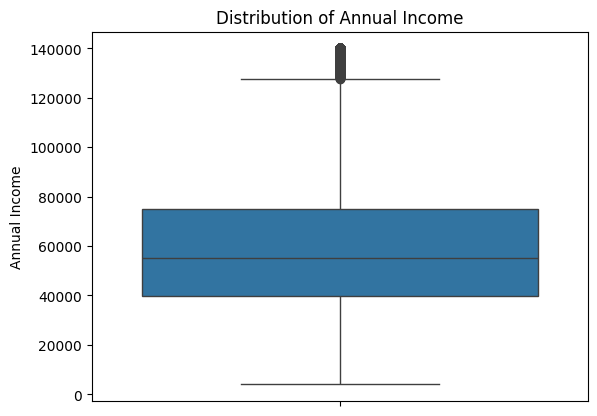

In [138]:
sns.boxplot(data['annual_inc'])
plt.title('Distribution of Annual Income')
plt.ylabel('Annual Income')
plt.show()

Here data has more outlier so lets try with IQR 

In [63]:
Q1 = data['annual_inc'].quantile(0.25)
Q3 = data['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'lower {lower_bound} and upper {upper_bound}')

lower -20000.0 and upper 140000.0


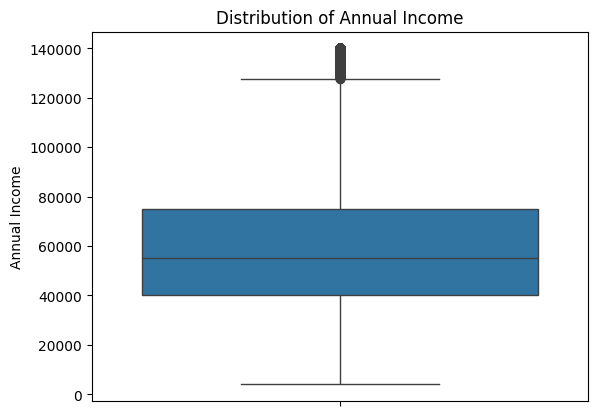

In [131]:
data = data[(data['annual_inc'] >= lower_bound) & (data['annual_inc'] <= upper_bound)]
sns.boxplot(data['annual_inc'])
plt.title('Distribution of Annual Income')
plt.ylabel('Annual Income')
plt.show()

Alternate approach is z score (-3 to +3)

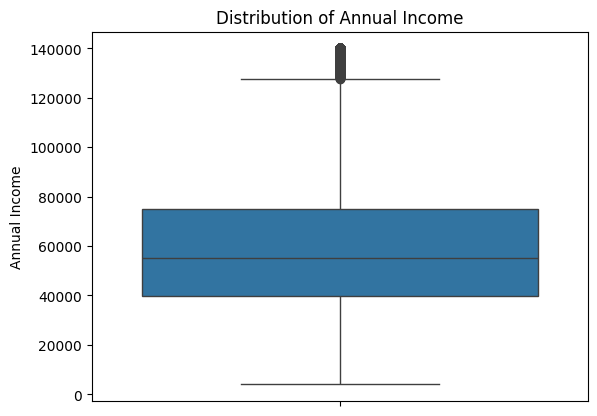

In [137]:
# using z score

from scipy.stats import zscore

# Calculate the Z-scores for the specific column
z_scores = zscore(data['annual_inc'])

# Filter the DataFrame to keep rows where the Z-score for the column is within the range (-3, 3)
data = data[(z_scores < 3) & (z_scores > -3)]
sns.boxplot(data['annual_inc'])

plt.title('Distribution of Annual Income')
plt.ylabel('Annual Income')
plt.show()

In [66]:
data['total_pymnt'].describe()

count    35423.000000
mean     10752.158016
std       7257.475907
min         33.730000
25%       5323.707337
50%       9090.083603
75%      14754.389320
max      41564.787240
Name: total_pymnt, dtype: float64

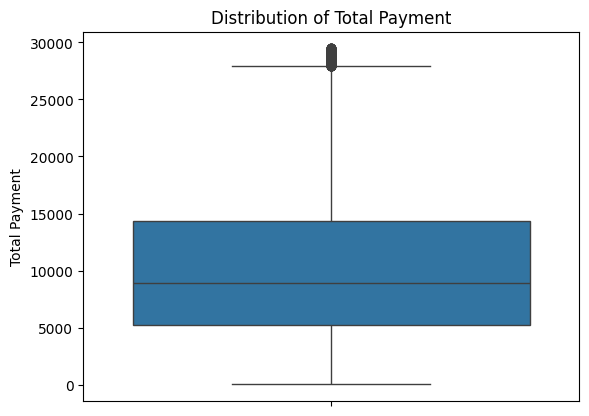

In [136]:
sns.boxplot(data['total_pymnt'])
#Create a box plot for the int_rate
plt.title('Distribution of Total Payment')
plt.ylabel('Total Payment')
plt.show()

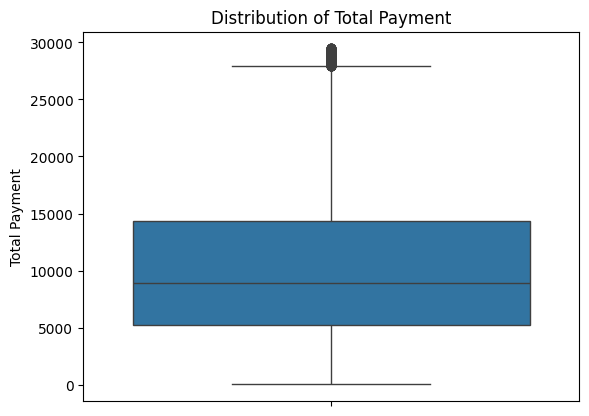

In [135]:
# Remove Outliers quantile .99 from total_pymnt
data = data[data['total_pymnt'] < data['total_pymnt'].quantile(0.99)]
sns.boxplot(data['total_pymnt'])
plt.title('Distribution of Total Payment')
plt.ylabel('Total Payment')
plt.show()

In [69]:
data['int_rate'] = data['int_rate'].astype('float64')

In [70]:
data['int_rate'].describe()

count    35068.000000
mean        11.715128
std          3.562082
min          5.420000
25%          8.900000
50%         11.490000
75%         14.170000
max         24.400000
Name: int_rate, dtype: float64

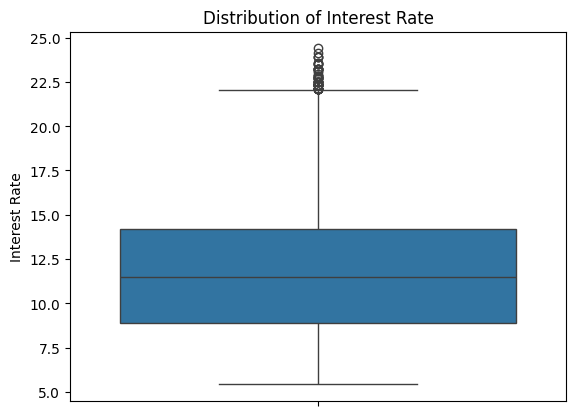

In [ ]:
#Create a box plot for the int_rate
sns.boxplot(data['int_rate'])
plt.title('Distribution of Interest Rate')
plt.ylabel('Interest Rate')
plt.show()

In [72]:
data['dti'].describe()

count    35068.00000
mean        13.39158
std          6.66920
min          0.00000
25%          8.27000
50%         13.50000
75%         18.67250
max         29.99000
Name: dti, dtype: float64

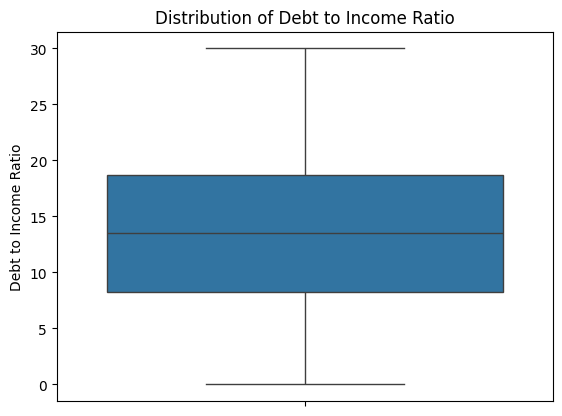

In [133]:
sns.boxplot(data['dti'])
plt.title('Distribution of Debt to Income Ratio')
plt.ylabel('Debt to Income Ratio')
plt.show()

Let's do analysis on categorical columns

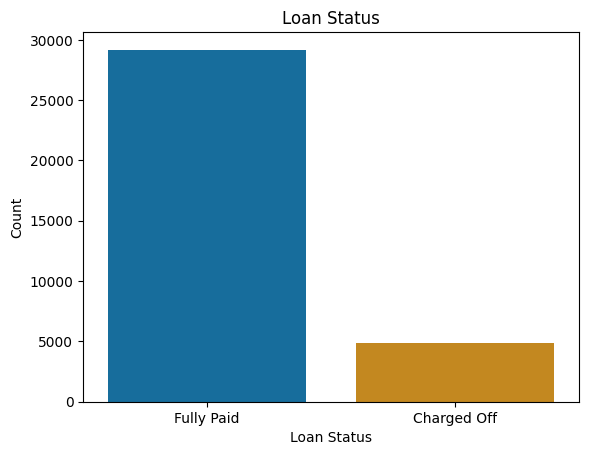

In [144]:
sns.countplot(x=data['loan_status'],palette='colorblind')
plt.title('Loan Status')
plt.ylabel('Count')
plt.xlabel('Loan Status')
plt.show()

we want to analyze Charged Off details to know what was the reason for charge and who are in this category. 

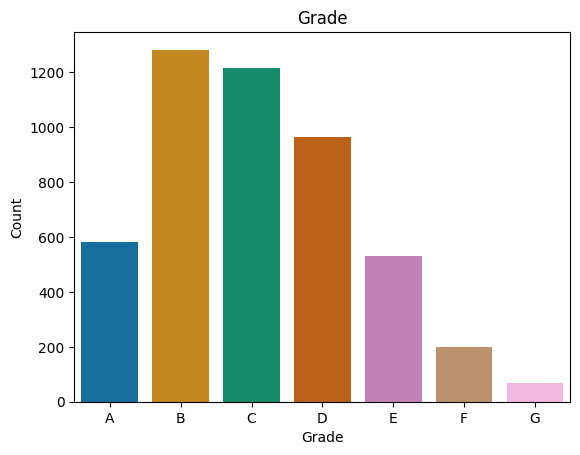

In [145]:
sns.countplot(x = 'grade',
              order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , 
              palette='colorblind',
              data = data[data.loan_status == 'Charged Off'])
plt.title('Grade')
plt.ylabel('Count')
plt.xlabel('Grade')
plt.show()

We want to plot for grade and subgrade so we would have to remove character form subgrade and keep numeric info only

In [76]:
data['sub_grade'] = data['sub_grade'].apply(lambda x : x[1])

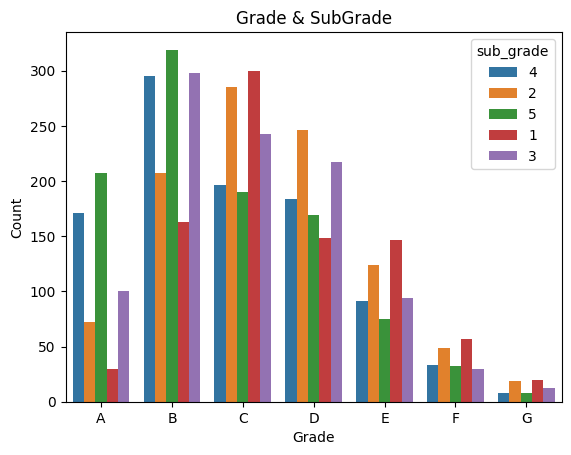

In [146]:
sns.countplot(x = 'grade', 
              hue = 'sub_grade',
              order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , 
              data = data[data.loan_status == 'Charged Off'])
plt.title('Grade & SubGrade')
plt.ylabel('Count')
plt.xlabel('Grade')
plt.show()

We can see that max count is for Grade = B and Sub Grade = 5

Now check home ownership

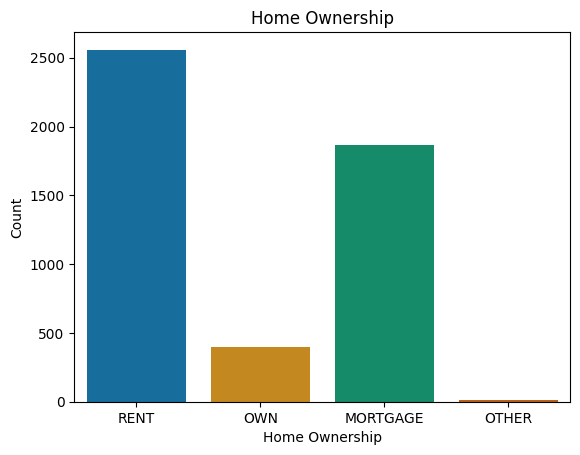

In [147]:
sns.countplot(x=data[data.loan_status == 'Charged Off']['home_ownership'],palette='colorblind')
plt.title('Home Ownership')
plt.ylabel('Count')
plt.xlabel('Home Ownership')
plt.show()

We can see that most of the Charged off users are either has status 'RENT' or 'MORTGAGE'

Analyze purpose of loan for Charged Off

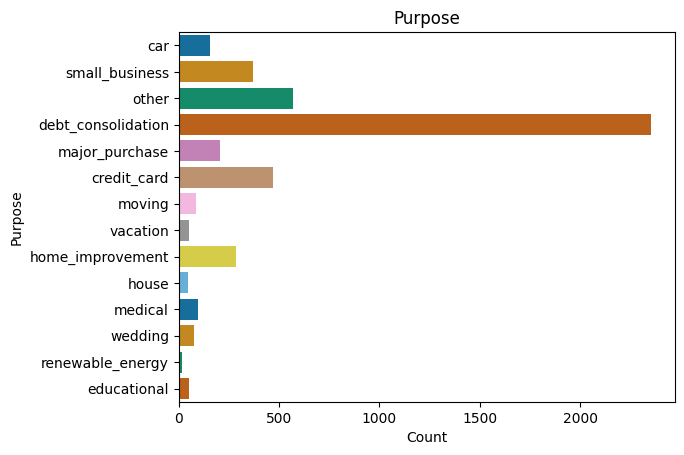

In [148]:
sns.countplot(y ='purpose', data=data[data.loan_status == 'Charged Off'], palette='colorblind')
plt.title('Purpose')
plt.ylabel('Purpose')
plt.xlabel('Count')
plt.show()

As we can see most of the Charged off users come under 'debt_consolidation' purpose

Lets see interest rate 

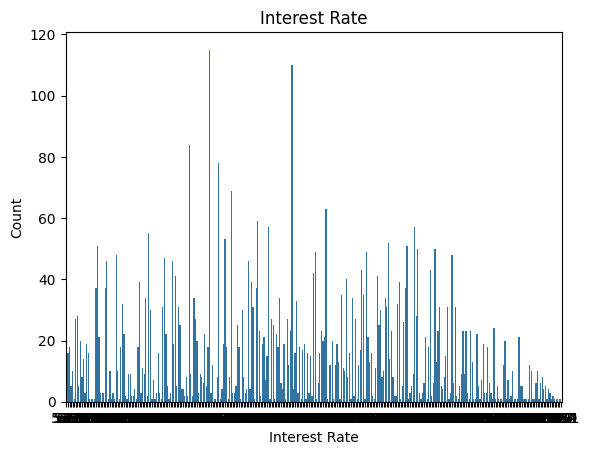

In [149]:
sns.countplot(x='int_rate', data=data[data.loan_status == 'Charged Off'])
plt.title('Interest Rate')
plt.ylabel('Count')
plt.xlabel('Interest Rate')
plt.show()

We can't see graph properly so we would have to create bins

In [81]:
data['int_rate'] = data['int_rate'].astype('float')

In [82]:
data['int_rate'].describe()

count    35068.000000
mean        11.715128
std          3.562082
min          5.420000
25%          8.900000
50%         11.490000
75%         14.170000
max         24.400000
Name: int_rate, dtype: float64

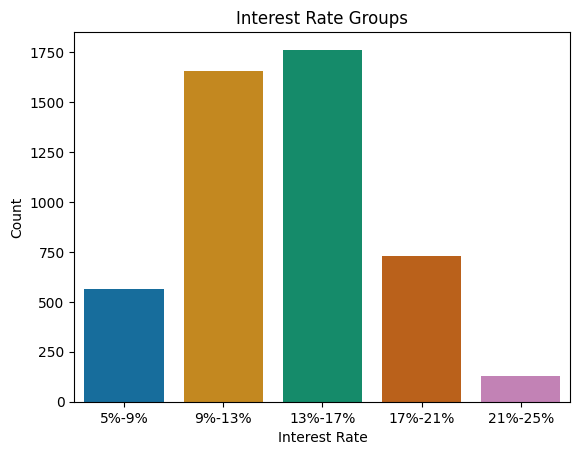

In [150]:
#  min = 5, max = 25, bin =5 , gap = 4  . . . . .
data['int_rate_bins'] = pd.cut(data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-25%'])
sns.countplot(x='int_rate_bins', data=data[data.loan_status == 'Charged Off'], palette='colorblind')
plt.title('Interest Rate Groups')
plt.ylabel('Count')
plt.xlabel('Interest Rate')
plt.show()

Let's analyze employee length for charged off users

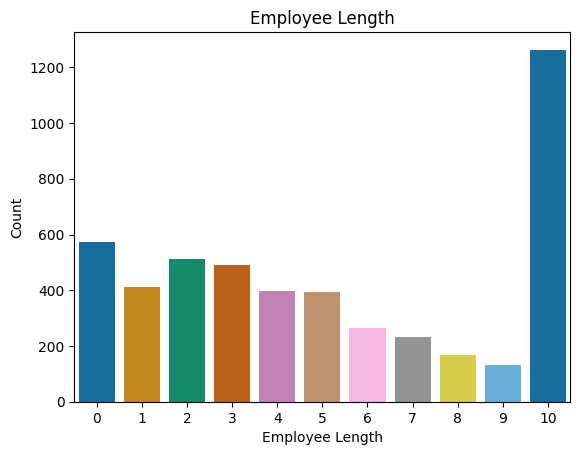

In [151]:
sns.countplot(x='emp_length', data=data[data.loan_status == 'Charged Off'], palette='colorblind')
plt.title('Employee Length')
plt.ylabel('Count')
plt.xlabel('Employee Length')
plt.show()

Here we can see that for emp_length = 10+ years is high

Let's analyze 'annual_income'

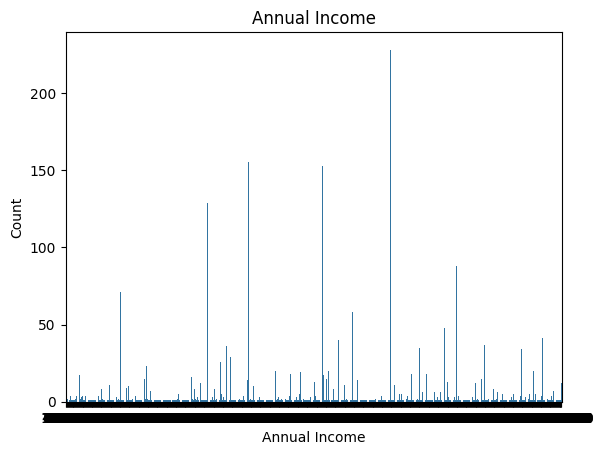

In [152]:
sns.countplot(x='annual_inc', data=data[data.loan_status == 'Charged Off'])
plt.title('Annual Income')
plt.ylabel('Count')
plt.xlabel('Annual Income')
plt.show()

We would have to create bins for 'annual_income'

In [86]:
data['annual_inc'].describe()

count     35068.000000
mean      59647.872019
std       27202.430352
min        4000.000000
25%       39996.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

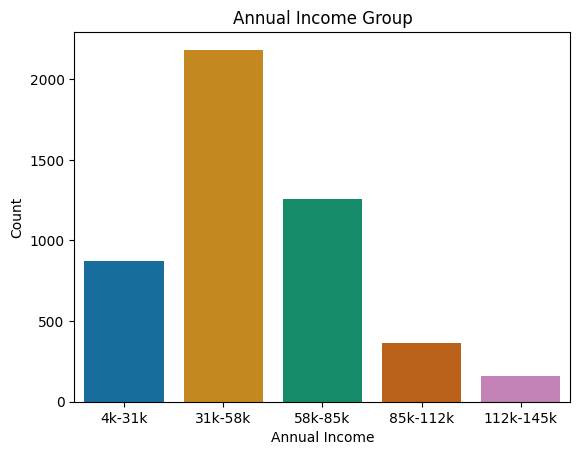

In [153]:
# min = 4k max = 145k bin = 5 gap = 27k
data['annual_inc_bins'] = pd.cut(data['annual_inc'], bins=5,precision =0,labels=['4k-31k', '31k-58k', '58k-85k', '85k-112k', '112k-145k'])
sns.countplot(x='annual_inc_bins', data=data[data.loan_status == 'Charged Off'], palette='colorblind')
plt.title('Annual Income Group')
plt.ylabel('Count')
plt.xlabel('Annual Income')
plt.show()

Here we can see users whose income is between 31k-58k are mostly charged off

Let's analyze 'pub_rec' -- Number of derogatory public records

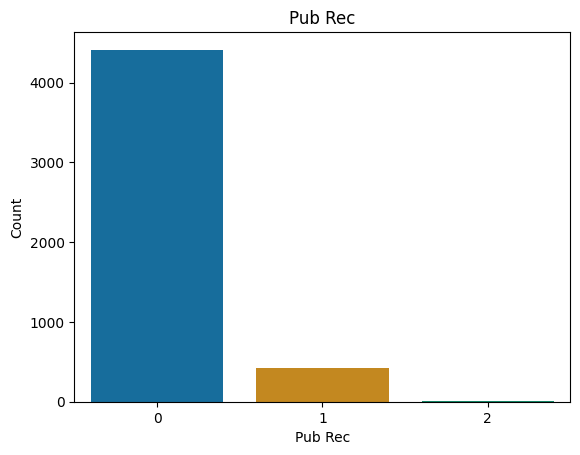

In [154]:
sns.countplot(x='pub_rec', data=data[data['loan_status']=='Charged Off'],palette='colorblind')
plt.title('Pub Rec')
plt.ylabel('Count')
plt.xlabel('Pub Rec')
plt.show()

Let's analyze 'open_acc' -- The number of open credit lines in the borrower's credit file.

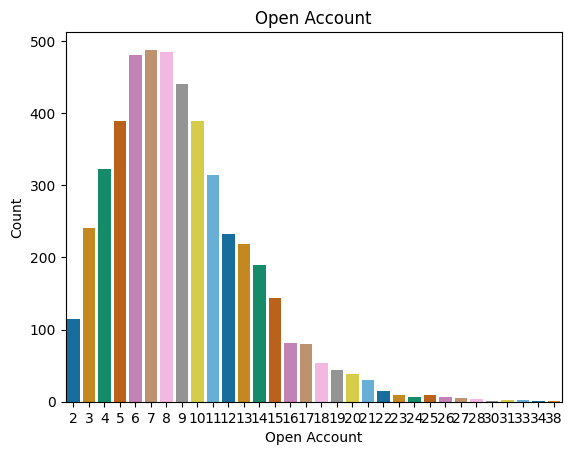

In [155]:
sns.countplot(x='open_acc', data=data[data['loan_status']=='Charged Off'],palette='colorblind')
plt.title('Open Account')
plt.ylabel('Count')
plt.xlabel('Open Account')
plt.show()

we would have to create bins for 'open_acc'

In [90]:
data['open_acc'].describe()

count    35068.000000
mean         9.113807
std          4.342643
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

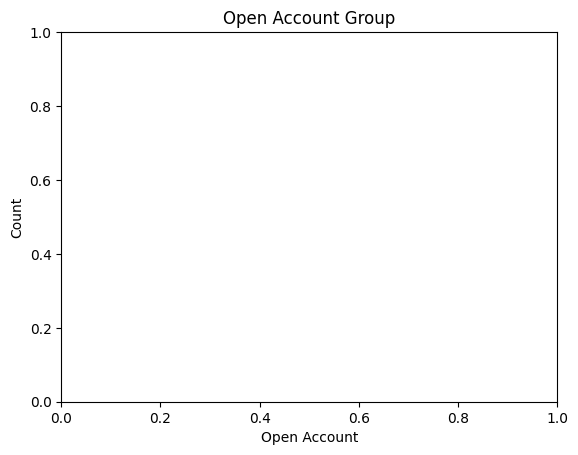

In [156]:
# min = 2 , max = 44, bins = 5  (2,,,,44) gap = 44-2/5 = 8.4 = round off 9
data['open_acc_bins'] = pd.cut(data['open_acc'],bins = 5,precision =0,labels=['2-11', '11-20', '20-29', '29-38', '38-44'])
plt.title('Open Account Group')
plt.ylabel('Count')
plt.xlabel('Open Account')
plt.show()

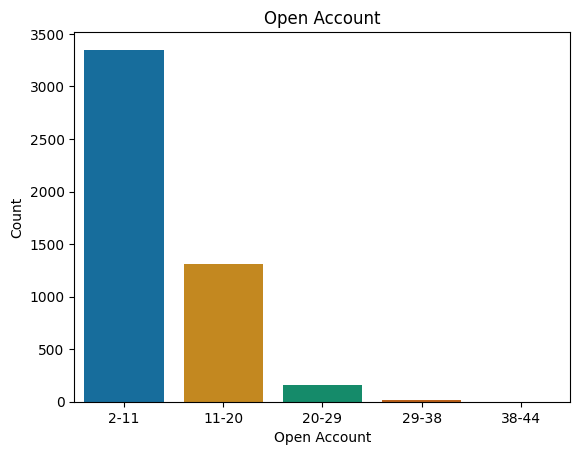

In [157]:
sns.countplot(x='open_acc_bins', data=data[data['loan_status']=='Charged Off'],palette='colorblind')
plt.title('Open Account')
plt.ylabel('Count')
plt.xlabel('Open Account')
plt.show()

Lets analyze 'revol_util' = Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

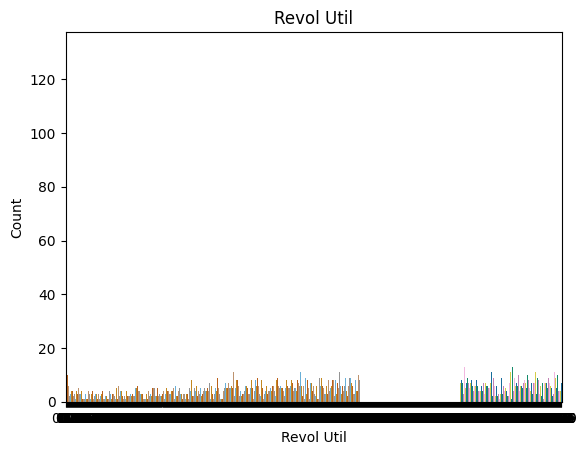

In [158]:
sns.countplot(x='revol_util', data=data[data['loan_status']=='Charged Off'],palette='colorblind')
plt.title('Revol Util')
plt.ylabel('Count')
plt.xlabel('Revol Util')
plt.show()

Convert into bins

In [94]:
data['revol_util'].describe()

count    35068.000000
mean        48.395526
std         28.272445
min          0.000000
25%         25.000000
50%         48.700000
75%         71.800000
max         99.900000
Name: revol_util, dtype: float64

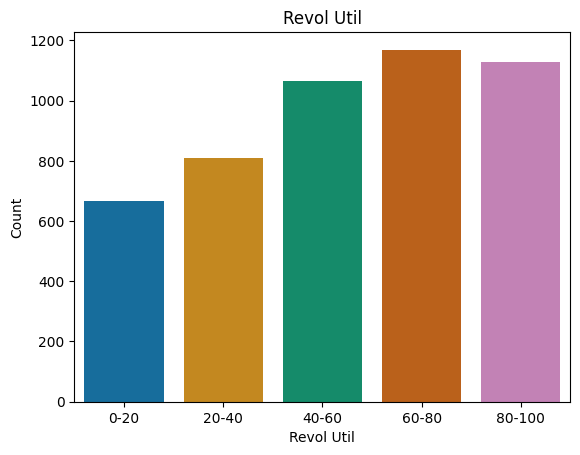

In [159]:
# min = 0, max = 99 , bin = 5  (0,,,,99) gap = 20
data['revol_util_bins'] = pd.cut(data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
sns.countplot(x='revol_util_bins', data=data[data['loan_status']=='Charged Off'],palette='colorblind')
plt.title('Revol Util')
plt.ylabel('Count')
plt.xlabel('Revol Util')
plt.show()

Let's analyze 'total_acc' = The total number of credit lines currently in the borrower's credit file

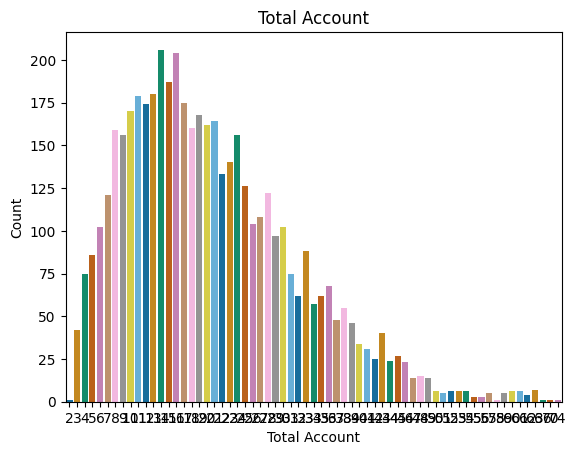

In [160]:
sns.countplot(x='total_acc', data=data[data['loan_status']=='Charged Off'],palette='colorblind')
plt.title('Total Account')
plt.ylabel('Count')
plt.xlabel('Total Account')
plt.show()

Create bins for 'total_acc'

In [97]:
data['total_acc'].describe()

count    35068.000000
mean        21.396031
std         11.171566
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64

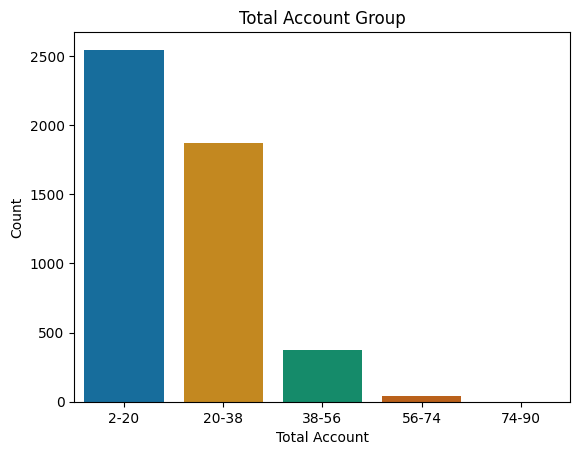

In [161]:
# min = 2, max = 90 , bin = 5, gap = 18
data['total_acc_bins'] = pd.cut(data['total_acc'], bins=5,precision =0,labels=['2-20','20-38','38-56','56-74','74-90'])
sns.countplot(x='total_acc_bins', data=data[data['loan_status']=='Charged Off'],palette='colorblind')
plt.title('Total Account Group')
plt.ylabel('Count')
plt.xlabel('Total Account')
plt.show()

Let's analyze 'term' column which has only 2 values

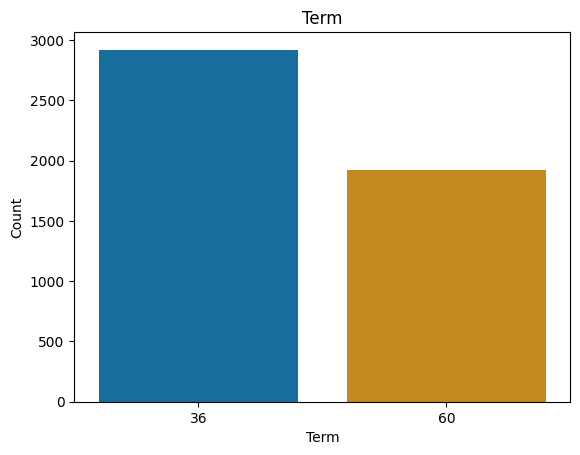

In [ ]:
sns.countplot(x='term', data=data[data['loan_status']=='Charged Off'], palette='colorblind')
plt.title('Loan Terms')
plt.ylabel('Count')
plt.xlabel('Loan Terms')
plt.show()

We can see for 36 months term we have more 'charged off' users

Let's analyze 'verification' status

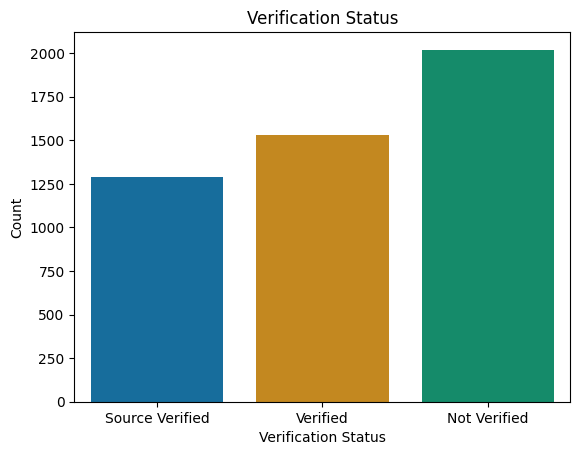

In [163]:
sns.countplot(x='verification_status', data=data[data['loan_status']=='Charged Off'], palette='colorblind')
plt.title('Verification Status')
plt.ylabel('Count')
plt.xlabel('Verification Status')
plt.show()

We can see more verified users are charged off users

Let's analyze 'inq_last_6mths' = The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

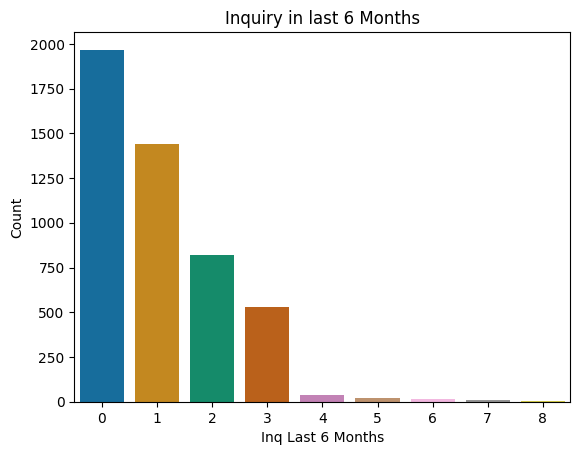

In [164]:
sns.countplot(x='inq_last_6mths', data=data[data['loan_status']=='Charged Off'], palette='colorblind')
plt.title('Inquiry in last 6 Months')
plt.ylabel('Count')
plt.xlabel('Inq Last 6 Months')
plt.show()

Let's analysis issue_dt. we have created 2 separate column month year


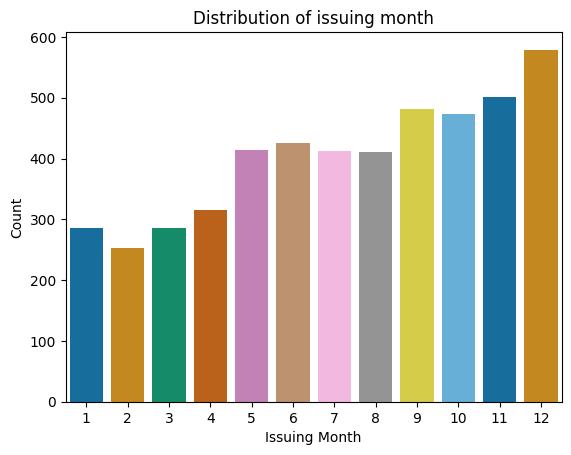

In [ ]:
sns.countplot(x='month',
               data=data[data['loan_status']=='Charged Off'],
               palette='colorblind')
plt.title('Distribution of issuing month')
plt.ylabel('Count')
plt.xlabel('Issuing Month')
plt.show()

Max no of charged off users are in December

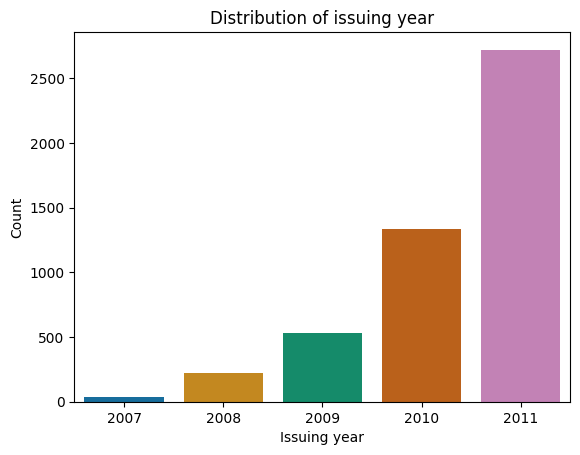

In [166]:
sns.countplot(x='year', 
              data=data[data['loan_status']=='Charged Off'],
              palette='colorblind')
plt.title('Distribution of issuing year')
plt.ylabel('Count')
plt.xlabel('Issuing year')
plt.show()

Max no of charged off users are in year 2011

Lets analyze 'installment'

<Axes: xlabel='installment', ylabel='count'>

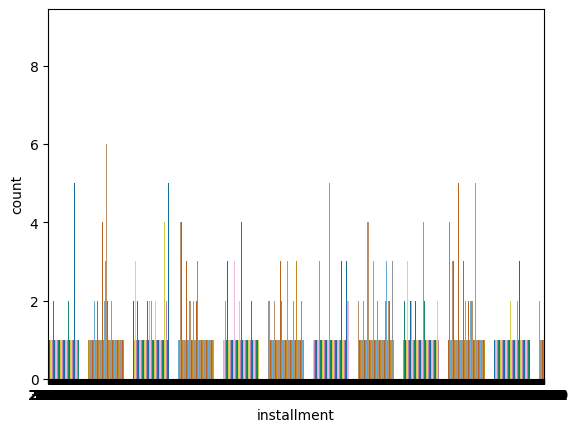

In [ ]:
sns.countplot(x='installment', data=data[data['loan_status']=='Charged Off'],palette='colorblind')
plt.title('Distribution of Installment')
plt.ylabel('Count')
plt.xlabel('Installment')
plt.show()

We would have to create bins for 'installment' because its value is highly continous

In [105]:
data['installment'].describe()

count    35068.000000
mean       291.759514
std        173.458093
min         15.690000
25%        160.400000
50%        260.575000
75%        388.670000
max        931.090000
Name: installment, dtype: float64

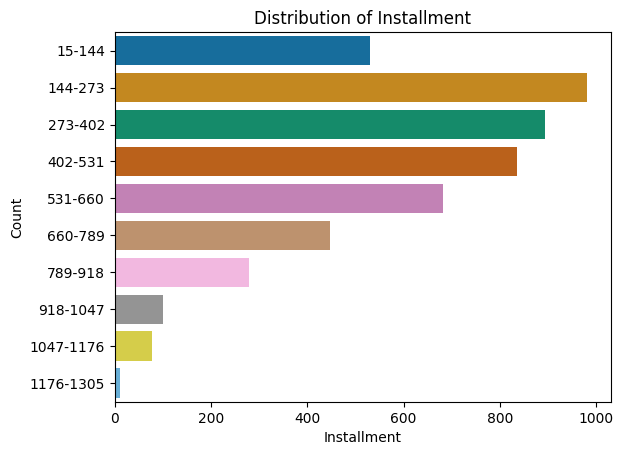

In [167]:
min_value = 15
max_value = 1305
bins = 10

data['installment_bins'] = pd.cut(data['installment'], bins=10,precision =0,labels=[f'{min_value + i*(max_value-min_value)//bins}-{min_value + (i+1)*(max_value-min_value)//bins}' for i in range(bins)])
sns.countplot(y='installment_bins', data=data[data['loan_status']=='Charged Off'],palette='colorblind')
plt.title('Distribution of Installment')
plt.ylabel('Count')
plt.xlabel('Installment')
plt.show()

Let's analyze 'funded_amnt_inv' = The total amount committed by investors for that loan at that point in time.

In [107]:
data['funded_amnt_inv'].value_counts()

funded_amnt_inv
5000.000000     1263
10000.000000    1210
6000.000000     1153
12000.000000     971
8000.000000      861
                ... 
1099.995904        1
1574.995234        1
150.000000         1
75.000000          1
979.800000         1
Name: count, Length: 7013, dtype: int64

In [108]:
data['funded_amnt_inv'].describe()

count    35068.000000
mean      9126.316819
std       5620.840079
min          0.000000
25%       4900.000000
50%       8000.000000
75%      12350.000000
max      24997.252700
Name: funded_amnt_inv, dtype: float64

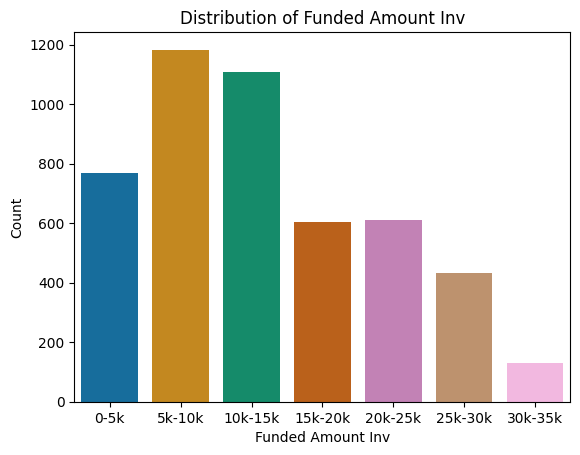

In [168]:
# min = 0 max = 35k bin =7 gap = 5k
data['funded_amnt_inv_bin'] = pd.cut(data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
sns.countplot(x='funded_amnt_inv_bin', data=data[data['loan_status']=='Charged Off'],palette='colorblind')
plt.title('Distribution of Funded Amount Inv')
plt.ylabel('Count')
plt.xlabel('Funded Amount Inv')
plt.show()

Let's analyze 'loan_amnt'

In [110]:
data['loan_amnt'].describe()

count    35068.000000
mean      9886.431362
std       5948.137183
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      33950.000000
Name: loan_amnt, dtype: float64

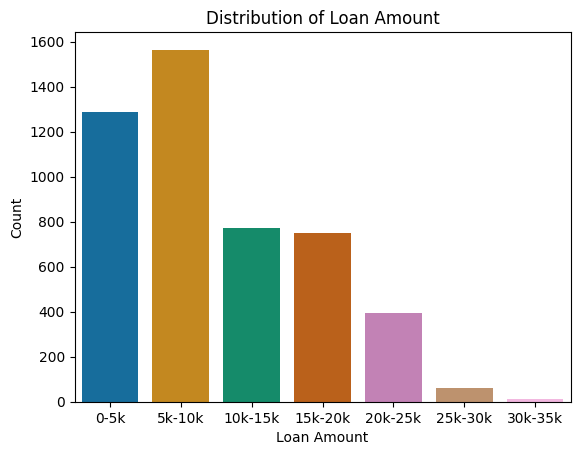

In [169]:
# min = 500 max = 35k bin =7 gap = 5k
data['loan_amnt_bin'] = pd.cut(data['loan_amnt'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
sns.countplot(x='loan_amnt_bin', data=data[data['loan_status']=='Charged Off'],palette='colorblind')
plt.title('Distribution of Loan Amount')
plt.ylabel('Count')
plt.xlabel('Loan Amount')
plt.show()

Let's analyze 'dti'col, as we have seen already in box plot dti is also continous variable
so we will create bins

In [112]:
data['dti'].describe()

count    35068.00000
mean        13.39158
std          6.66920
min          0.00000
25%          8.27000
50%         13.50000
75%         18.67250
max         29.99000
Name: dti, dtype: float64

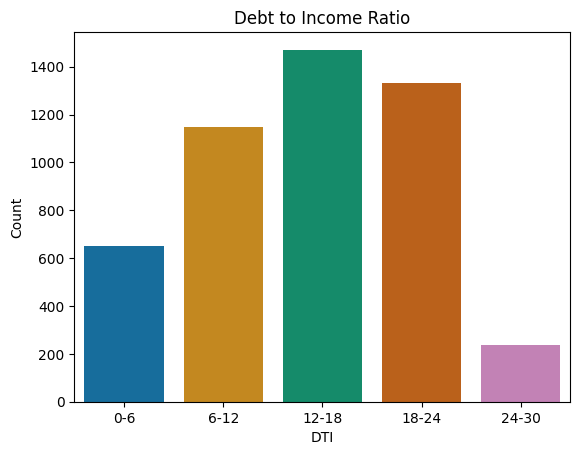

In [170]:
# min - 0, max = 29, bin = 5, gap = 6
data['dti_bins'] = pd.cut(data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
sns.countplot(x='dti_bins', data=data[data['loan_status']=='Charged Off'],palette='colorblind')
plt.title('Debt to Income Ratio')
plt.ylabel('Count')
plt.xlabel('DTI')
plt.show()

# Observations

The analysis of charged-off loans reveals several key factors that contribute to a higher probability of loan defaults. The following variables were identified as significant indicators of default:

1. Borrowers with a grade 'B' loan status are more likely to default.
2. Loans classified under the 'B5' sub-grade show a higher risk of default.
3. Applicants with 'RENT' as their house ownership status are at a greater risk.
4. Loans taken for debt consolidation (to clear other debts) are more likely to be charged off.
5. A 13-17% interest rate correlates with an increased likelihood of default.
6. Employment length greater than or equal to 10 years is linked with higher default rates.
7. Borrowers with an annual income between 31k and 58k have a higher chance of default.
8. A derogatory public records value of 0 (no negative records) still indicates a higher probability of default.
9. A lower number of open accounts, specifically between 2 and 11, suggests a greater risk of default.
10. Revolving utilization rates between 60-80% are associated with a higher likelihood of loan default.
11. Borrowers with 2 to 20 total accounts tend to default more frequently.
12. 36-month loan terms have been observed to be linked with increased default rates.
13. Verified loan status (including Source Verified) is associated with a higher probability of default compared to non-verified loans.
14. Applicants with 0 inquiries in the past 6 months show a higher likelihood of default.
15. Loans issued in the month of December have a higher risk of being charged off.
16. Loans taken in the year 2011 have been identified as showing a higher default rate.
17. Installment amounts between 144k to 273k are correlated with a higher likelihood of default.
18. Funded amount investments between 5k and 10k appear to be associated with higher default rates.
19. Loans with a loan amount between 5k and 10k exhibit higher default tendencies.
20. A Debt-to-Income (DTI) ratio between 12% and 18% indicates an increased risk of loan default.

# Bivariate Analysis-

Annual Income with other columns

Annual Income vs Loan Purpose

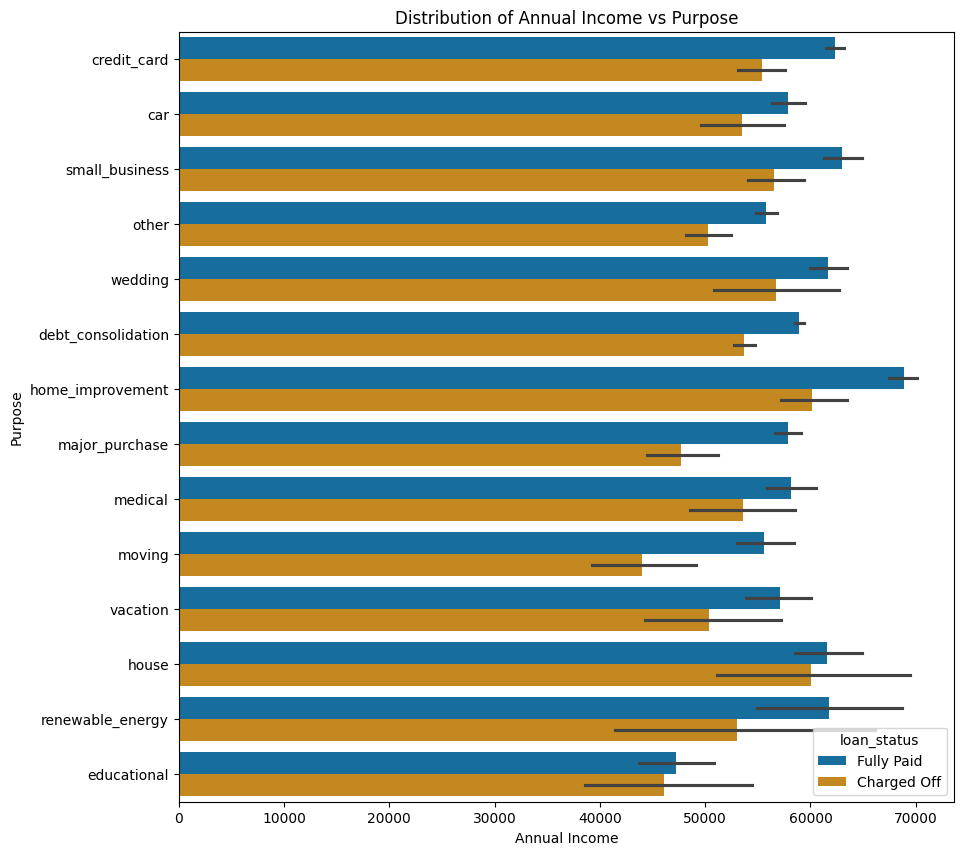

In [172]:
plt.figure(figsize=(10,10))
sns.barplot(data = data,x='annual_inc', y='purpose', hue ='loan_status',palette="colorblind")
plt.title('Distribution of Annual Income vs Purpose')
plt.ylabel('Purpose')
plt.xlabel('Annual Income')
plt.show()

As per chart we can see if annual income increase then most of the loan is taken for 'Home Improvement'
Small_business, renewable_energy



Annual income vs home ownership

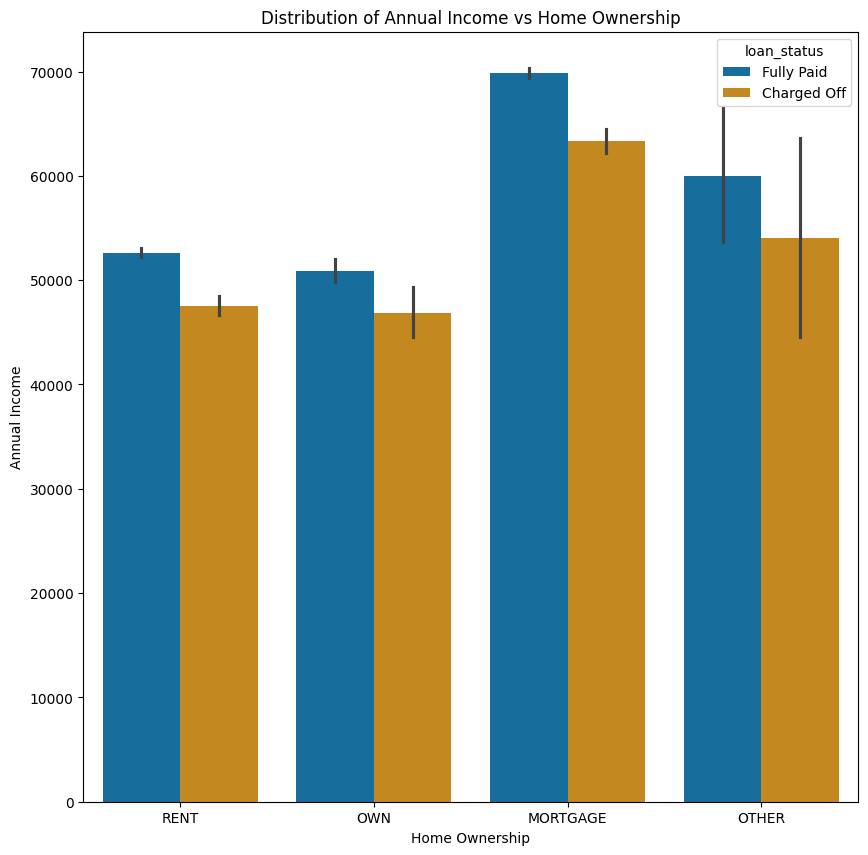

In [173]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="colorblind")
plt.title('Distribution of Annual Income vs Home Ownership')
plt.ylabel('Annual Income')
plt.xlabel('Home Ownership')
plt.show()

Annual income vs Loan Status

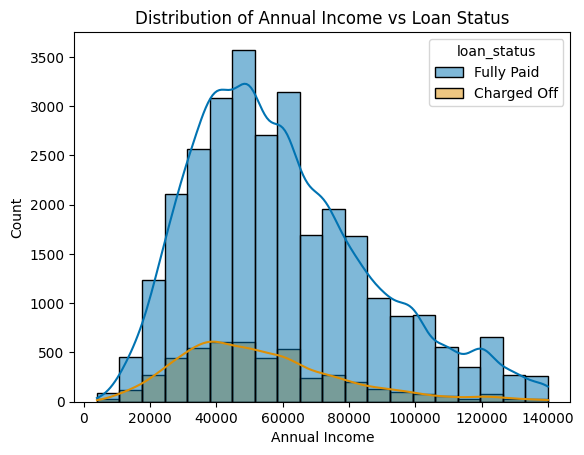

In [ ]:

sns.histplot(data =data, x='annual_inc',
              hue ='loan_status', kde=True,
              bins = 20,palette="colorblind")
plt.title('Distribution of Annual Income vs Loan Status')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

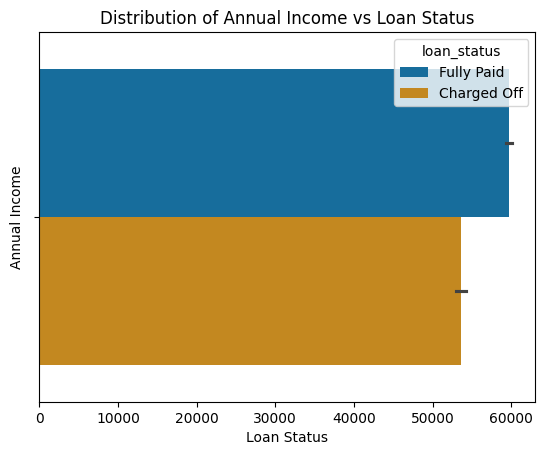

In [190]:
sns.barplot(data =data, x='annual_inc', hue ='loan_status',palette="colorblind")
plt.title('Distribution of Annual Income vs Loan Status')
plt.ylabel('Annual Income')
plt.xlabel('Loan Status')
plt.show()

Annual income vs int_rate

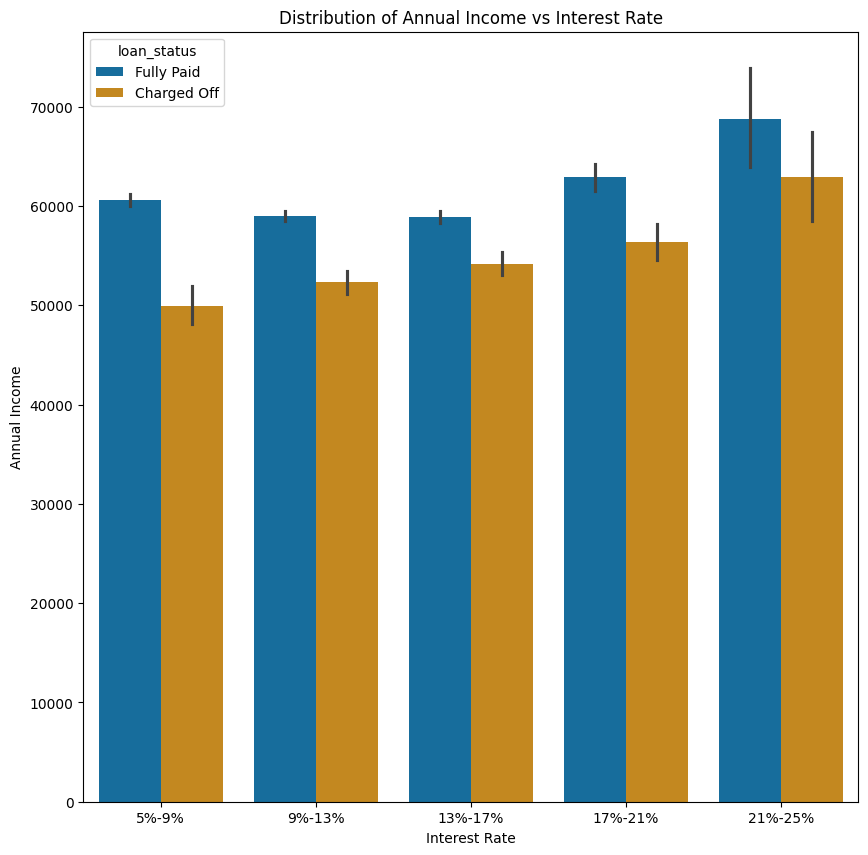

In [174]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='int_rate_bins', y='annual_inc', hue ='loan_status',palette="colorblind")
plt.title('Distribution of Annual Income vs Interest Rate')
plt.ylabel('Annual Income')
plt.xlabel('Interest Rate')
plt.show()

Let's analyze loan_amount

Loan Amount vs Interest Rate

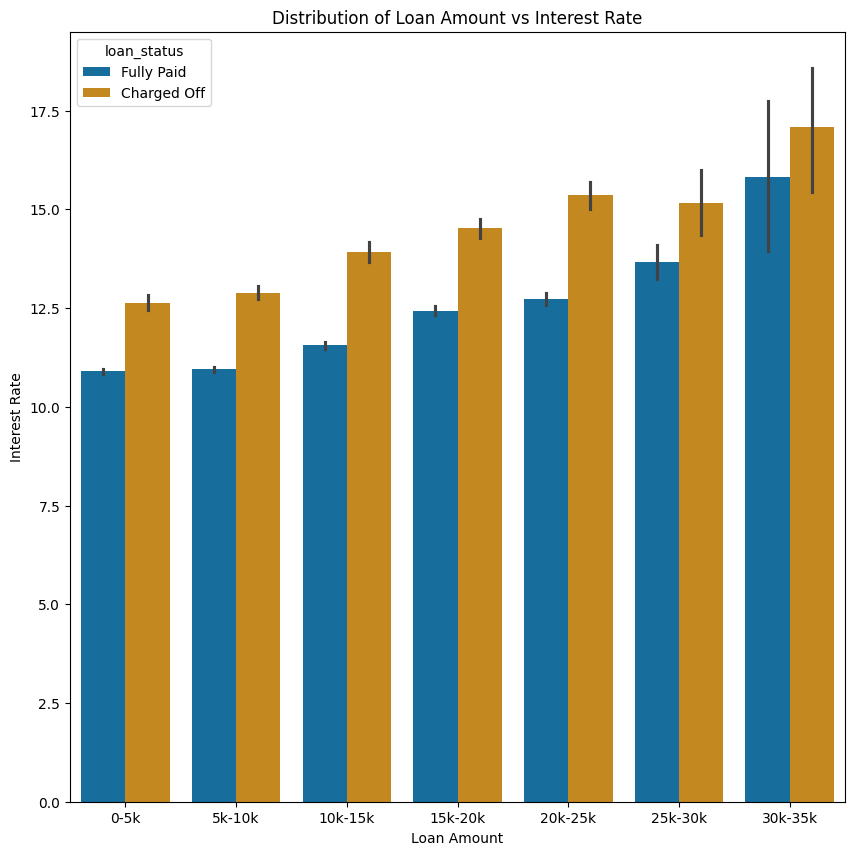

In [175]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='loan_amnt_bin', y='int_rate', hue ='loan_status',palette="colorblind")
plt.title('Distribution of Loan Amount vs Interest Rate')
plt.ylabel('Interest Rate')
plt.xlabel('Loan Amount')
plt.show()

Loan Amount vs Loan Purpose

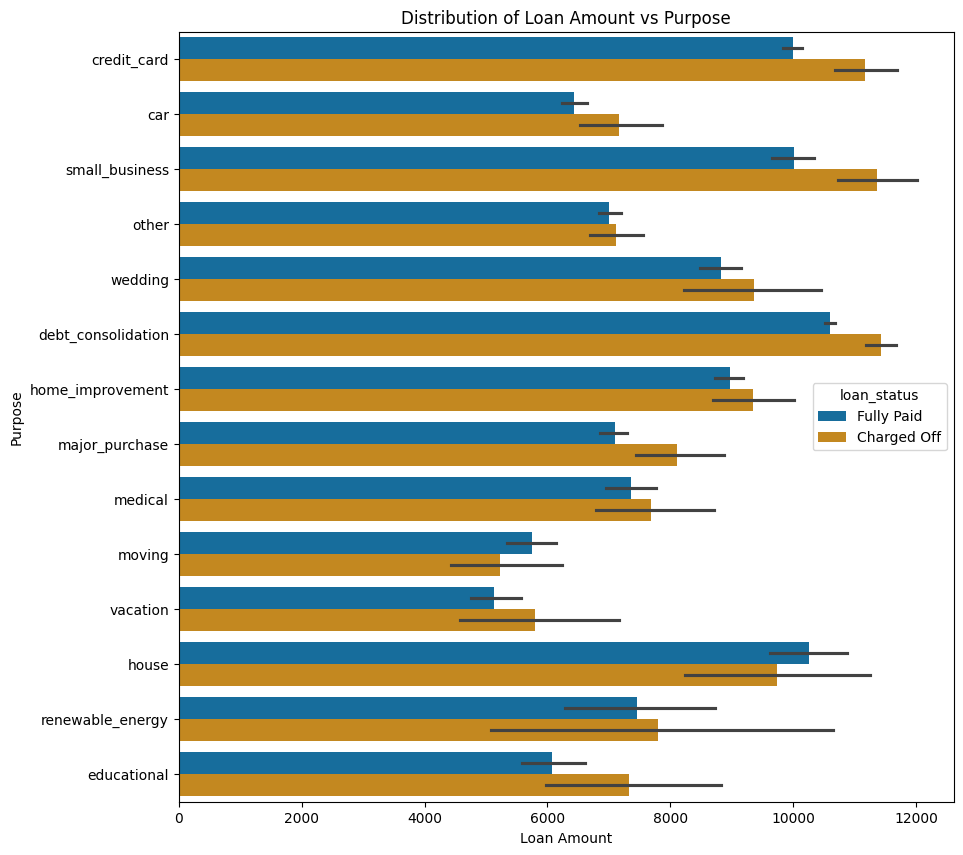

In [176]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='loan_amnt', y='purpose', hue ='loan_status',palette="colorblind")
plt.title('Distribution of Loan Amount vs Purpose')
plt.ylabel('Purpose')
plt.xlabel('Loan Amount')
plt.show()

Loan vs House Ownership

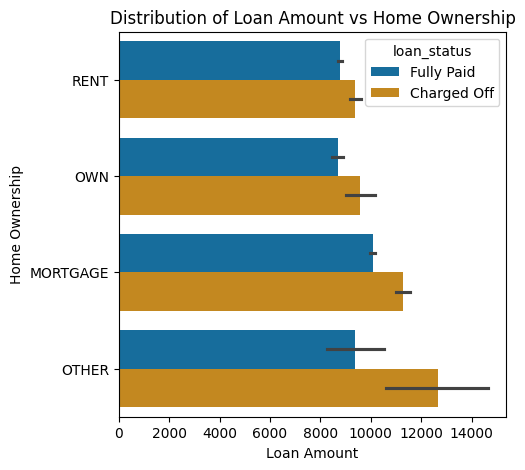

In [201]:
plt.figure(figsize=(5,5))
sns.barplot(data =data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="colorblind")
plt.title('Distribution of Loan Amount vs Home Ownership')
plt.ylabel('Home Ownership')
plt.xlabel('Loan Amount')
plt.show()

Loan amount vs month issued

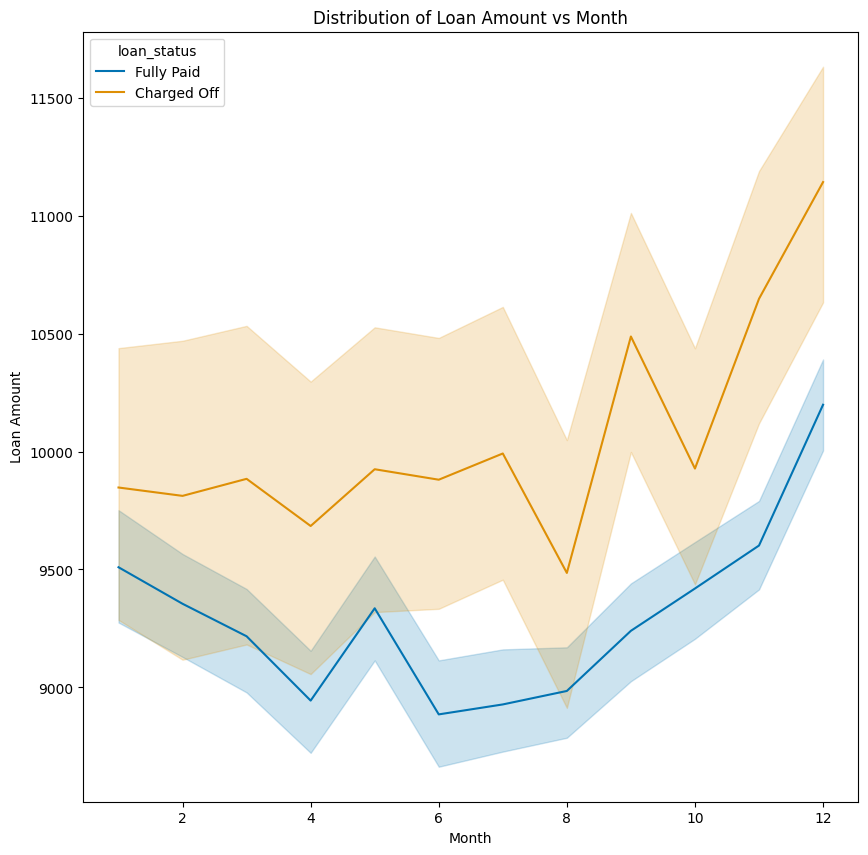

In [178]:
plt.figure(figsize=(10,10))
sns.lineplot(data =data,y='loan_amnt', x='month', hue ='loan_status',palette="colorblind")
plt.title('Distribution of Loan Amount vs Month')
plt.ylabel('Loan Amount')
plt.xlabel('Month')
plt.show()

Loan amount vs year issued

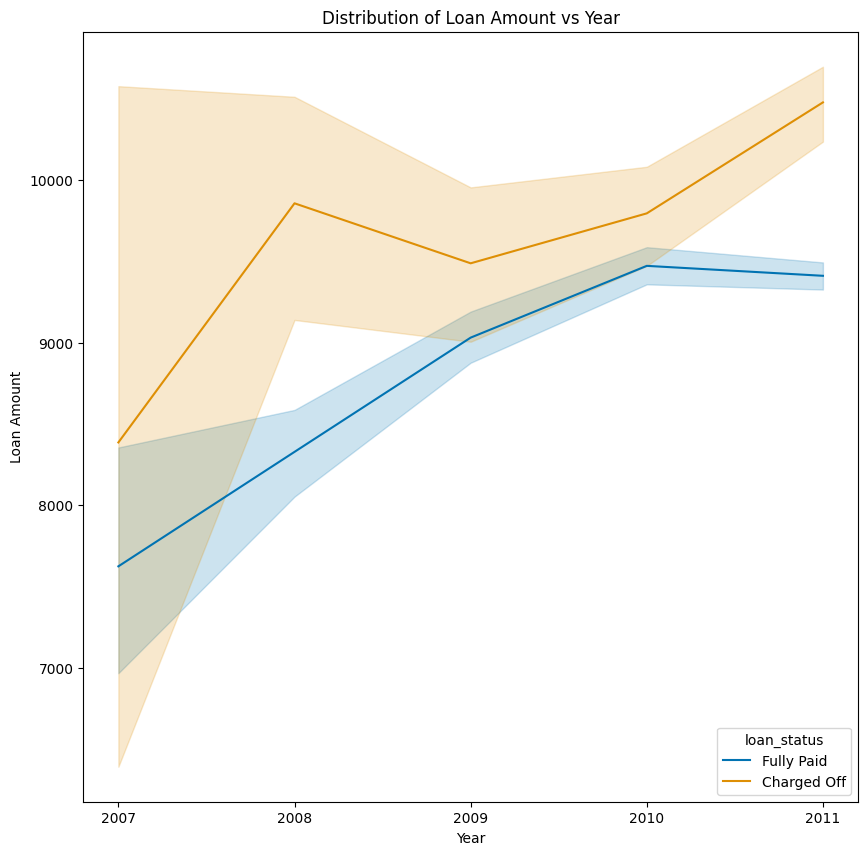

In [179]:
plt.figure(figsize=(10,10))
sns.lineplot(data =data,y='loan_amnt', x='year', hue ='loan_status',palette="colorblind")
plt.xticks(ticks=range(2007, 2012))
plt.title('Distribution of Loan Amount vs Year')
plt.ylabel('Loan Amount')
plt.xlabel('Year')
plt.show()

Loan Amount vs Grade

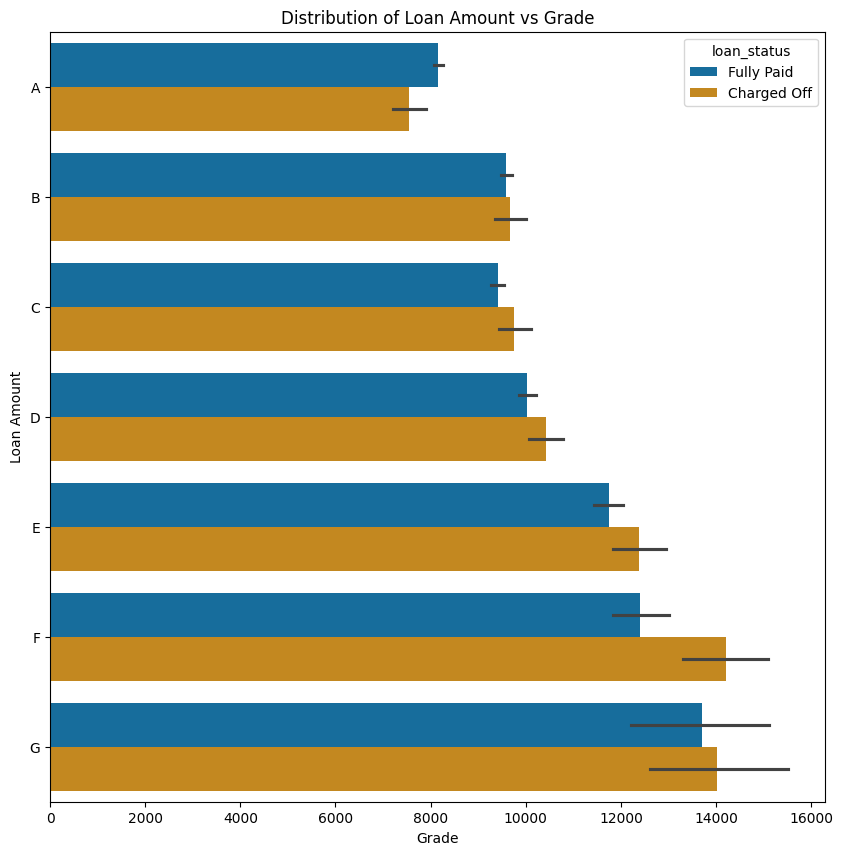

In [180]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='loan_amnt', y='grade', hue ='loan_status',palette="colorblind", order=['A','B','C','D','E','F','G'])
plt.title('Distribution of Loan Amount vs Grade')
plt.ylabel('Loan Amount')
plt.xlabel('Grade')
plt.show()

Interest Rate vs Loan status

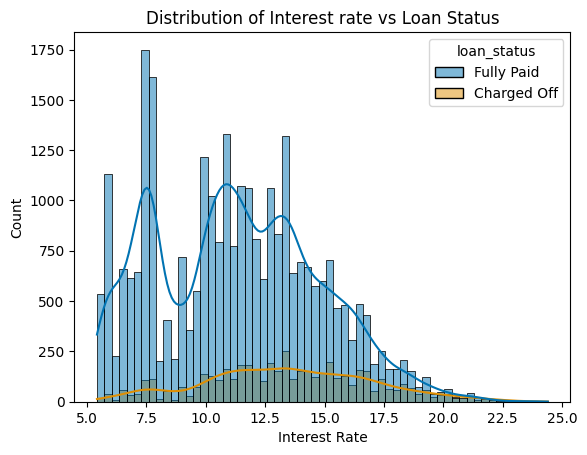

In [ ]:
sns.histplot(data =data,x='int_rate',
              hue ='loan_status'
              palette="colorblind",kde=True)
plt.title('Distribution of Interest rate vs Loan Status')
plt.ylabel('Count')
plt.xlabel('Interest Rate')
plt.show()

Loan Amount vs Emp_length & Verification Status

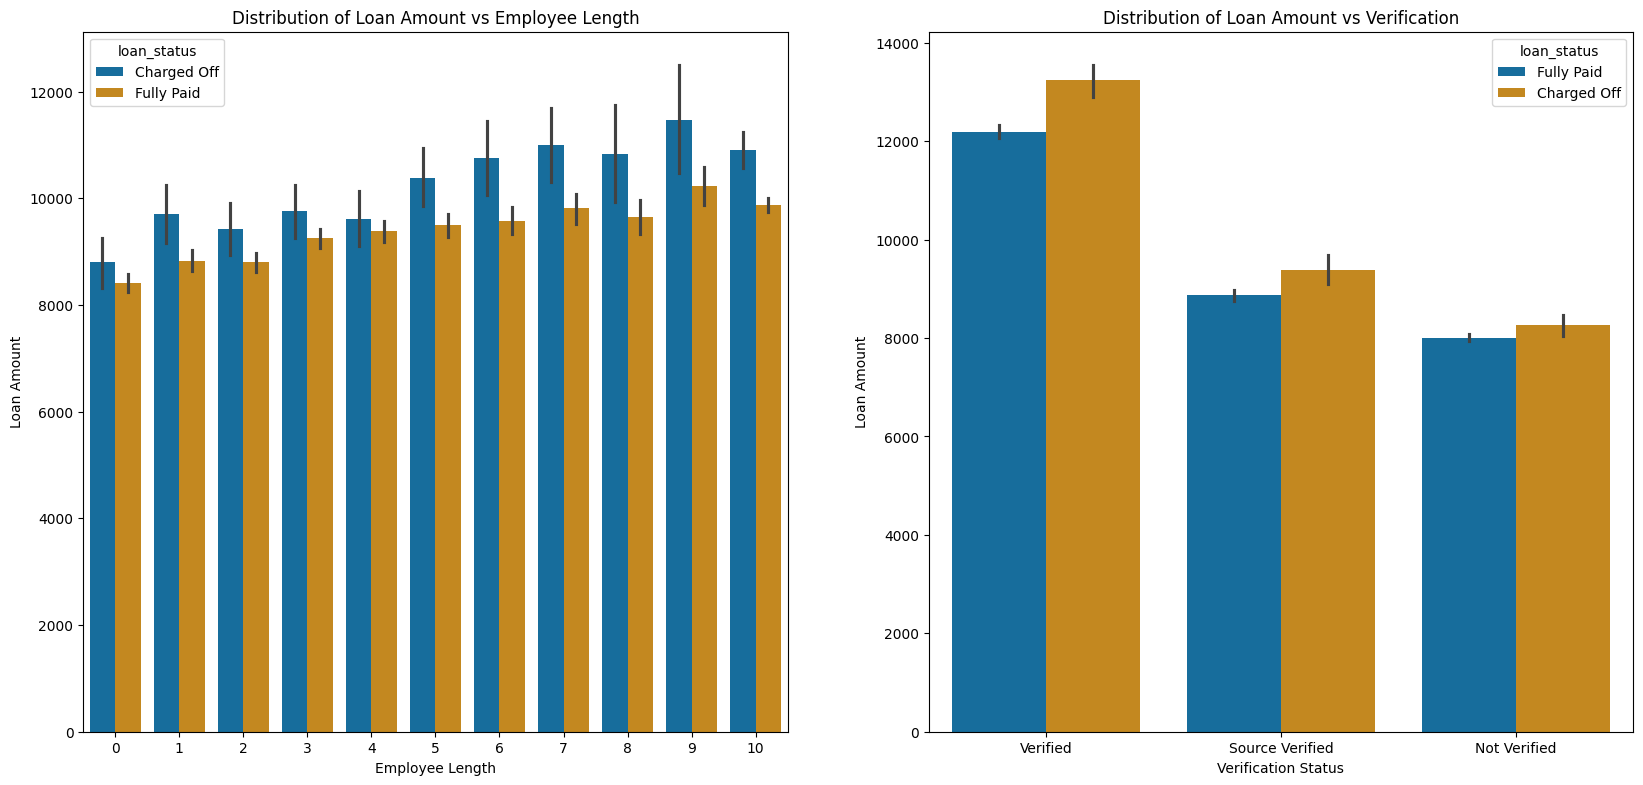

In [181]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="colorblind")
plt.title('Distribution of Loan Amount vs Employee Length')
plt.ylabel('Loan Amount')
plt.xlabel('Employee Length')

plt.subplot(222)
sns.barplot(data =data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="colorblind")
plt.title('Distribution of Loan Amount vs Verification')
plt.ylabel('Loan Amount')
plt.xlabel('Verification Status')
plt.show()

Loan Amount vs Loan Status

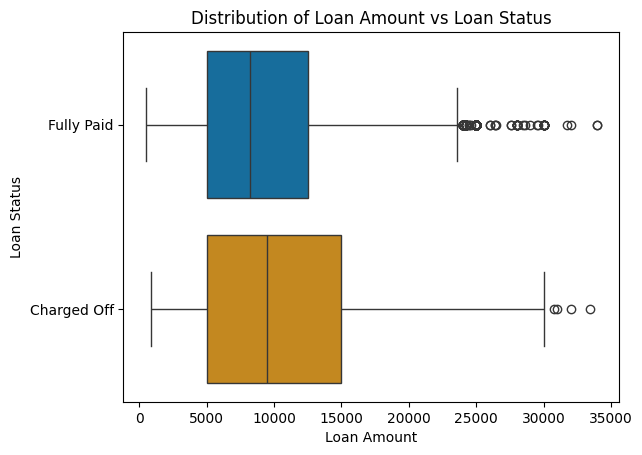

In [ ]:
sns.boxplot(data =data,x='loan_amnt', 
            y ='loan_status',palette="colorblind")
plt.title('Distribution of Loan Amount vs Loan Status')
plt.ylabel('Loan Status')
plt.xlabel('Loan Amount')
plt.show()

grade vs interest rate


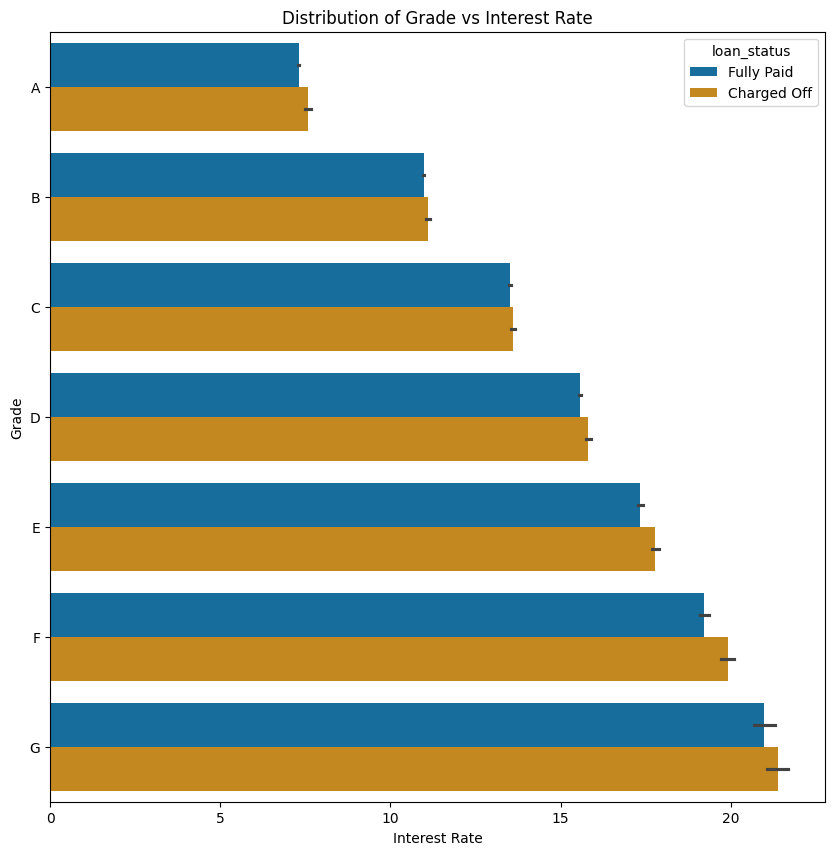

In [182]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='int_rate', y='grade', hue ='loan_status',palette="colorblind", order=['A','B','C','D','E','F','G'])
plt.title('Distribution of Grade vs Interest Rate')
plt.ylabel('Grade')
plt.xlabel('Interest Rate')
plt.show()

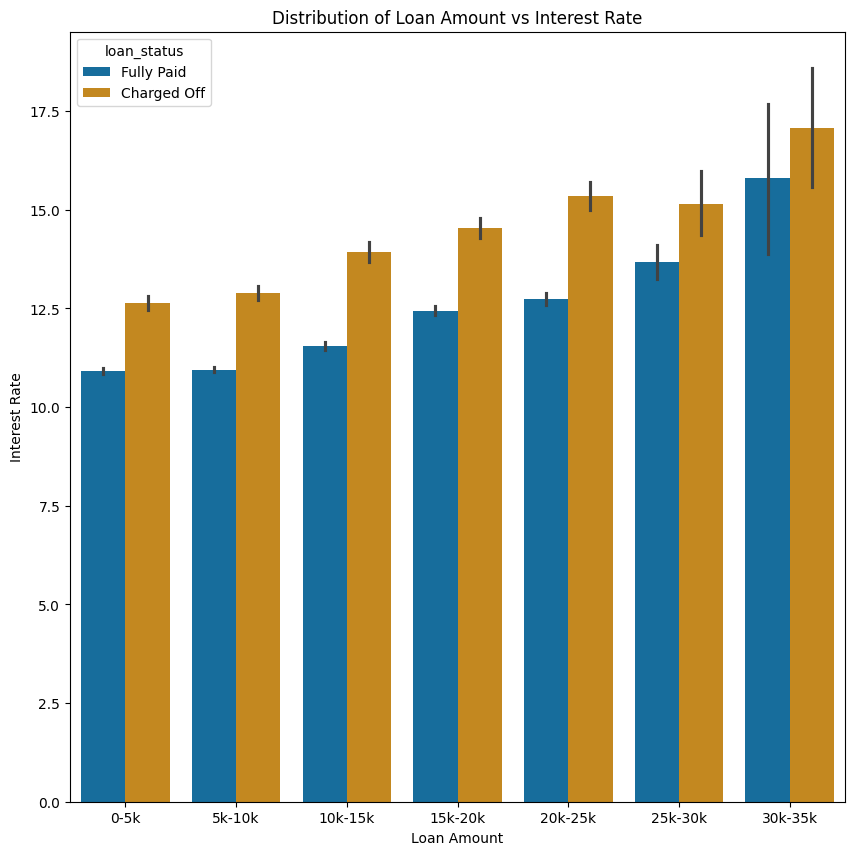

In [183]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,y='int_rate', x='loan_amnt_bin', hue ='loan_status',palette="colorblind")
plt.title('Distribution of Loan Amount vs Interest Rate')
plt.ylabel('Interest Rate')
plt.xlabel('Loan Amount')
plt.show()

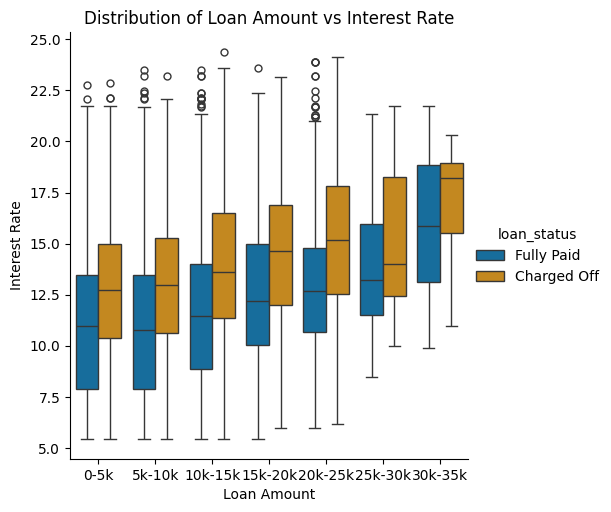

In [184]:
sns.catplot(data =data,y ='int_rate', x ='loan_amnt_bin', hue ='loan_status',palette="colorblind",kind = 'box')
plt.title('Distribution of Loan Amount vs Interest Rate')
plt.ylabel('Interest Rate')
plt.xlabel('Loan Amount')
plt.show()

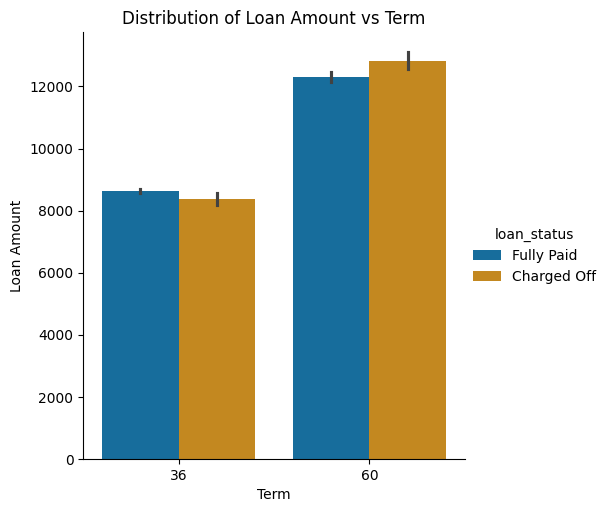

In [185]:
sns.catplot(x = 'term', y = 'loan_amnt', data = data,hue = 'loan_status', kind = 'bar',palette='colorblind')
plt.title('Distribution of Loan Amount vs Term')
plt.ylabel('Loan Amount')
plt.xlabel('Term')
plt.show()


Observations

The analysis of charged-off loans reveals several factors that increase the likelihood of loan default. These high-risk situations include:

1. Applicants with an income of 60k–70k who take loans for home improvement.
2. Applicants with homeownership status as 'MORTGAGE' and income in the 60k–70k range.
3. Applicants receiving an interest rate of 21–24% with an income between 70k–80k.
4. Applicants who take loans of 30k–35k with an interest rate of 15–17.5%.
5. Applicants borrowing for small businesses with loan amounts greater than 14k.
6. Applicants with a 'MORTGAGE' status and loans of 14k–16k.
7. When the credit grade is F and the loan amount is between 15k–20k.
8. When employment length is 10 years and the loan amount is between 12k–14k.
9. When the loan is verified, and the loan amount exceeds 16k.
10. For grade G loans with an interest rate above 20%.
This insight helps in identifying default-prone applicants, aiding in the reduction of potential credit losses.

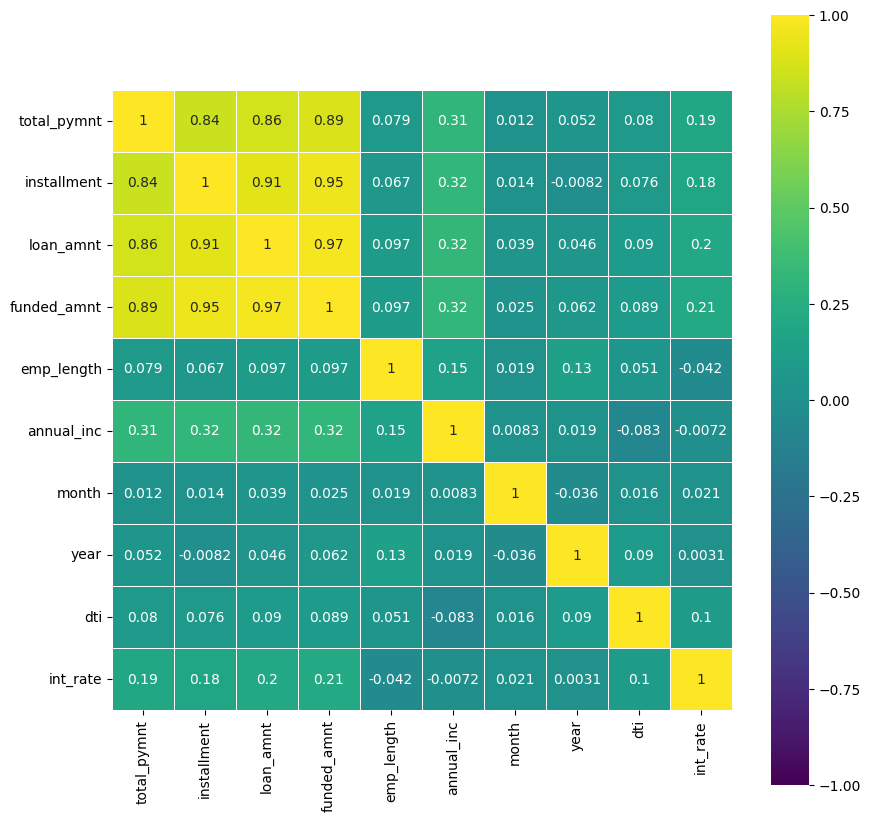

In [209]:
# heatmap with numeric columns where we have done some analysis before
cols = ['total_pymnt', 'installment', 'loan_amnt', 'funded_amnt', 'emp_length',
        'annual_inc','month','year','dti','int_rate']
loan_correlation = data[cols].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(loan_correlation,annot=True,
            cmap="viridis", 
            vmin=-1, 
            vmax=1, center=0, linewidths=0.5, square=True)
plt.show()

## Detailed Analysis of Univariate and Bivariate

Univariate Analysis

##### 1. Defaulted vs Fully Paid Loans:

The number of defaulted loans is significantly lower, approximately 6 times less than the number of fully paid loans. This suggests that a larger portion of borrowers are successfully repaying their loans, while a smaller fraction defaults.

##### 2. Loan Term Duration:

The analysis reveals that the number of loans with a 36-month term is 3.5 times higher than those with a 60-month term. This indicates that borrowers tend to prefer loans with shorter durations, potentially due to quicker repayment goals and manageable monthly installments.

##### 3. Interest Rates on Loans:

The majority of loans were taken with interest rates between 5% to 7.5% and 10% to 15%. This suggests that borrowers are most comfortable with moderate to high-interest rates, likely due to the affordability and availability of loans within these interest rate ranges.

##### 4. Employment Length:

People with 10+ years of employment constitute the largest group of borrowers, indicating that individuals with longer employment histories tend to be more reliable borrowers, possibly due to their stability and financial capability to repay loans.

##### 5. Income Group of Borrowers:

The majority of loans are taken by individuals in the lower-income group (annual income between 20k to 90k). This shows that loans are largely accessed by people with moderate financial means, which could suggest that lending companies are targeting a broader range of individuals, including those with average incomes.

##### 6. Loan Grades:

Most loans belong to Grade A and B categories, indicating that borrowers who are considered lower-risk (according to their credit grades) are more likely to take out loans.

##### 7. Home Ownership:

A significant portion of borrowers either rent or are mortgaged and do not own their homes. This suggests that individuals without property ownership are taking out loans, likely for personal or financial needs, rather than for homeownership.

##### 8. Verification Status:

More than 50% of loans are verified by the lending company or are classified as Source Verified. This indicates that the lending company ensures that the majority of loans are checked for credibility before disbursement.

##### 9. Loan Purpose:

Most loans are taken for either credit card repayment or debt consolidation. This suggests that borrowers are seeking loans primarily to manage existing debts or improve their credit situation.

##### 10. Public Records:

A majority of borrowers have no public records indicating bankruptcy or derogatory marks, implying that most loan applicants have a clean financial background, which is a positive sign for lenders.

##### 11. Debt-to-Income Ratio (DTI):

A significant portion of borrowers have a high DTI ratio ranging between 8% to 22%, indicating that many individuals are taking on more debt compared to their income. This could potentially be a red flag, as a high DTI ratio can indicate financial strain.

##### 12. Loan Trends over Time:

Loan disbursements show a tendency to increase towards the end of the year, with a progressive rise in loan counts every month, as compared to previous months. This suggests a seasonal increase in loan activity, possibly driven by year-end financial needs or holiday spending.

##### 13. Annual Loan Growth:

Loan approvals appear to be growing at an exponential rate, with year-over-year growth in the number of loans approved. This indicates that the lending company is approving more loans each year, likely due to increased demand or expanded lending operations.

# Bivariate Analysis

##### 1. Income Group and Loan Default:

Borrowers with an annual income of 50k or less are more likely to default compared to higher-income groups. This suggests that income is a strong predictor of loan repayment ability, with lower-income individuals facing greater financial strain.

##### 2. Interest Rate and Default Probability:

As the interest rate increases, the default ratio also rises. Higher interest rates may indicate that borrowers are struggling to meet loan obligations, which could lead to an increased risk of default.

##### 3. Employment Length and Loan Default:

Borrowers with 10+ years of employment are less likely to default and have a higher chance of fully repaying their loans. This finding highlights the importance of stable employment in ensuring loan repayment.

##### 4. Loan Grade and Default Rate:

Loans with a higher Grade A (and corresponding Sub Grade A categories) exhibit a higher risk of default, whereas Grade G (and its Sub Grades) demonstrate a lower default rate. This may indicate that the credit scoring model used to classify loans might show unexpected trends, with higher-grade loans having higher default rates.

##### 5. Loan Amount and Default Probability:

The probability of a loan being charged off increases with the loan amount, particularly for amounts above 50% of the loan range. This suggests that larger loans, especially those in the range of 25k and above, are at higher risk of default.

##### 6. Home Ownership and Loan Default:

Individuals who don’t own a home and are renting or mortgaged tend to have a higher chance of defaulting, particularly with smaller loan amounts (around 10k or less). Banks should be cautious when issuing loans to such individuals.

# Driving Factors for Loan Default Prediction
Key factors that can be used to predict the likelihood of loan default include:

1. Income Group – Lower-income groups are more likely to default.
2. Interest Rate – Higher interest rates increase the probability of default.
3. Sub-grade – Higher subgrades have a higher default rate.
4. Home Ownership – Renters and mortgaged individuals have a higher chance of default.
5. Debt-to-Income (DTI) Ratio – A higher DTI ratio is linked with a higher likelihood of default.

`The analysis indicates that loan defaults are influenced by multiple factors, including income level, credit grade, loan purpose, interest rate, employment length, loan term, and verification status. Loan defaults are more prevalent among applicants with lower-to-moderate incomes, high DTI ratios, moderate interest rates, and specific credit grades (e.g., B, F, G). These findings can inform risk assessment and targeted lending policies to mitigate default risks.`